# EasyVisa Project
##### 09/17/2023

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Import necessary libraries and data; define EDA chart functions

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Remove limit for number of displayed columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# libraries for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# plot functions code source: DSBA IncomeGroupClassification_CaseStudy_DSBA_V2.ipynb
# histogram & boxplot function
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# stacked barplot function
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset from csv
load_df = pd.read_csv('/content/drive/MyDrive/DSBA/Ensemble Techniques/project/EasyVisa.csv')

# create copy to work with
df1 = load_df.copy()

## Data Overview

In [ ]:
# view first five rows
df1.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# view last five rows
df1.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
# view shape of dataset
df1.shape

(25480, 12)

- The dataset has 25,480 rows and 12 columns

In [ ]:
# view column information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# check for missing values
df1.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
# check for duplcate rows
df1.duplicated().sum()

0

- There are no null values in the dataset
- There are no duplicative rows in the dataset

In [ ]:
# set object columns to categories
object_cols = df1.select_dtypes(['object'])
object_cols.columns

for col in object_cols.columns:
    df1[col] = df1[col].astype('category')

# check column info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


- There are nine columns with categorical datatype, two  with integer datatype, and one with float datatype
- The target feature is case_status

## Exploratory Data Analysis (EDA)

In [ ]:
# describe numerical data
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [ ]:
# check the negative values in no. employees
neg_emp_df = df1[df1['no_of_employees']<0]
neg_emp_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [ ]:
# negative values in no. employees linke an entry error - convert to abs
df1['no_of_employees'] = abs(df1['no_of_employees'])
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- Number of employees ranges from 11 to 602,069 with an average of 5,667
- Year of establishment ranges from 1800 to 2016 with an average of 1979
- Prevailing wage has a range from 2.14 to 319,210.27 with an average of 74,455,81
  - This large range is due to the unit of wage being different among the previlaing wage data

In [ ]:
# describe categorical data
df1.describe(include='category').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


- Case ID is an ID column and not useful for analysis or modeling
- Case status is the target variable with 17,018 of the 25,480 records being 'Certified'
- The most frequently occuring continent is Asia
- The most frequently occuring education is Bachelor's
- Those with job experience occur the most frequently
- Those not requiring job training is the most frequent
- The most frequently occuring region is Northest
- The most frequently occuring unit of wage is Year
- Full time positions occur more often than others

In [ ]:
# case_id is the primary key and is not need for statictcal analysis or model building, drop case_id
df1.drop(['case_id'], axis=1, inplace=True)

In [ ]:
# view unique values for categorical columns
cat_cols = df1.select_dtypes("category")

for col in cat_cols.columns:
    print('Unique values in',col,'column:')
    print(cat_cols[col].value_counts())
    print('*'*50)

Unique values in continent column:
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee column:
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience column:
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training column:
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in region_of_employment column:
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
***************************

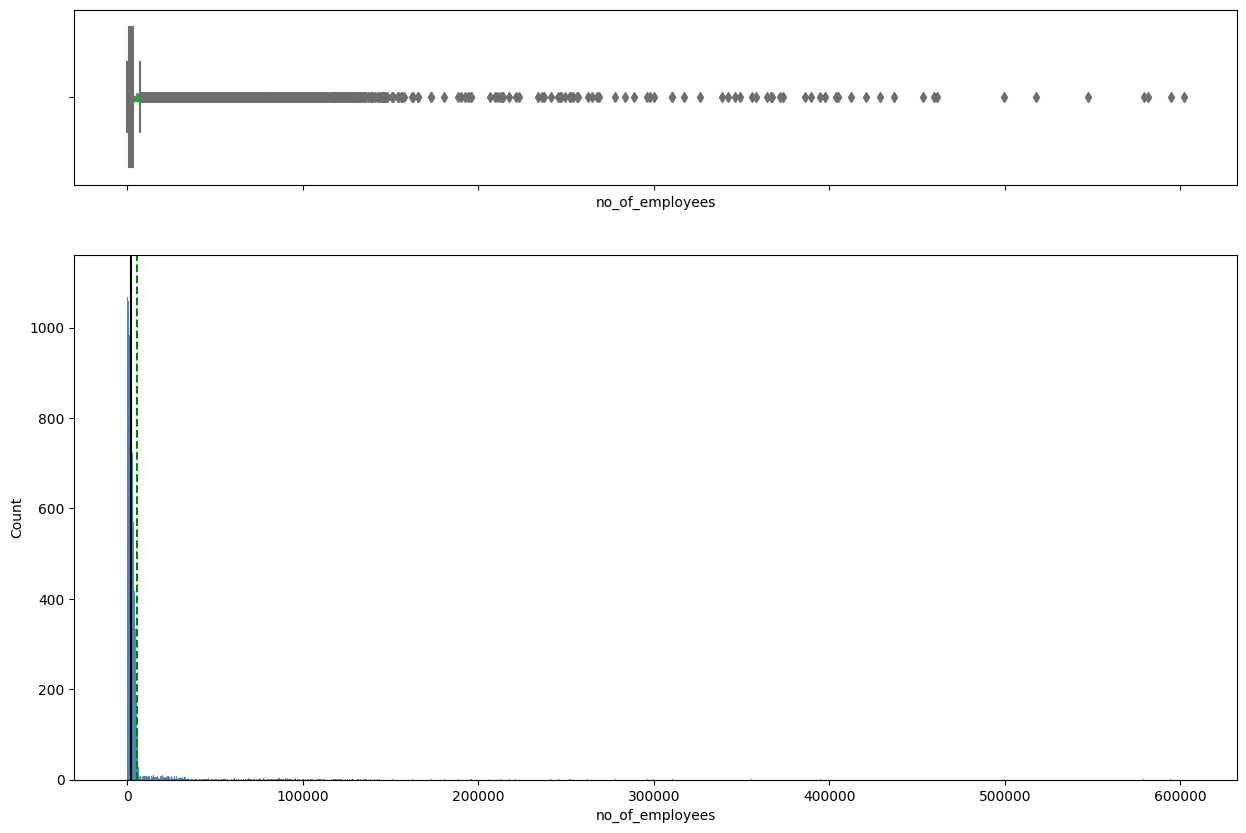

In [ ]:
# histogram & boxplot of no. employees
histogram_boxplot(df1, "no_of_employees")

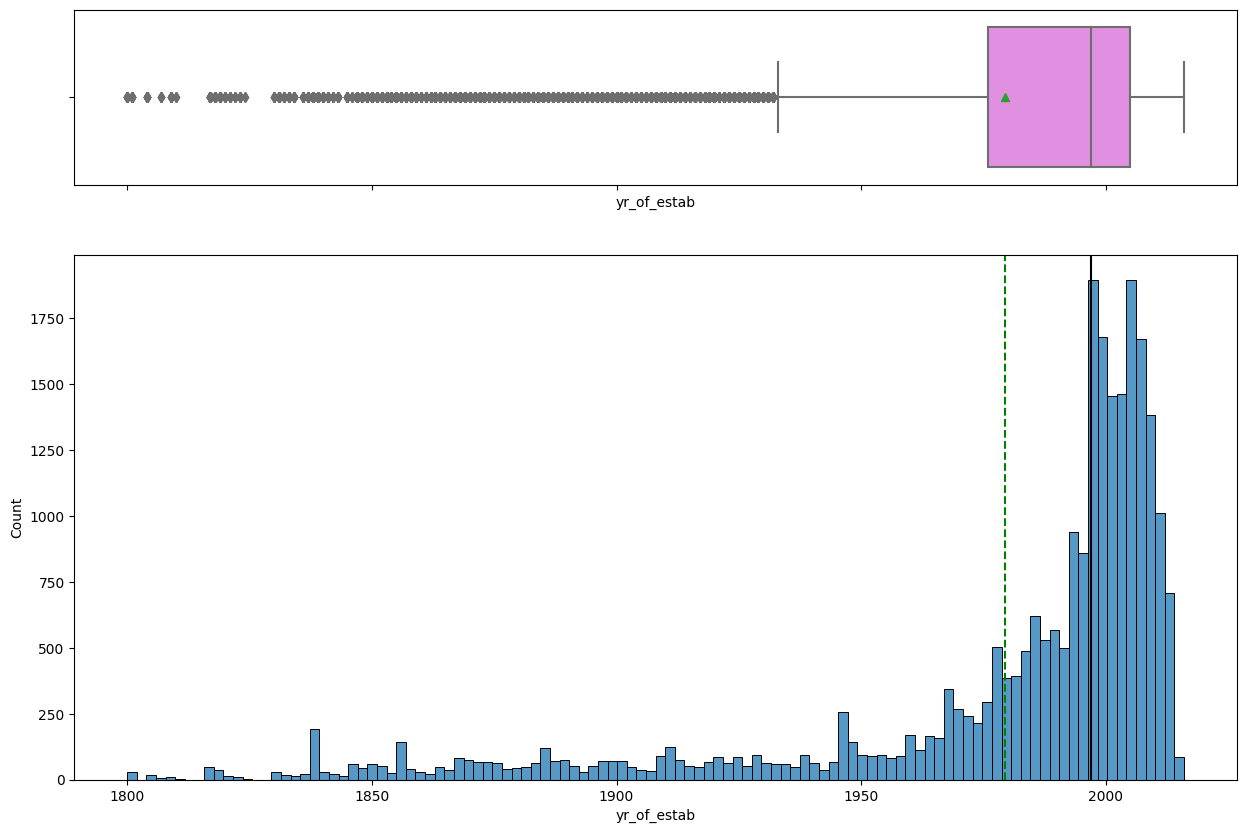

In [ ]:
# histogram & boxplot of yr_of_estab
histogram_boxplot(df1, "yr_of_estab")

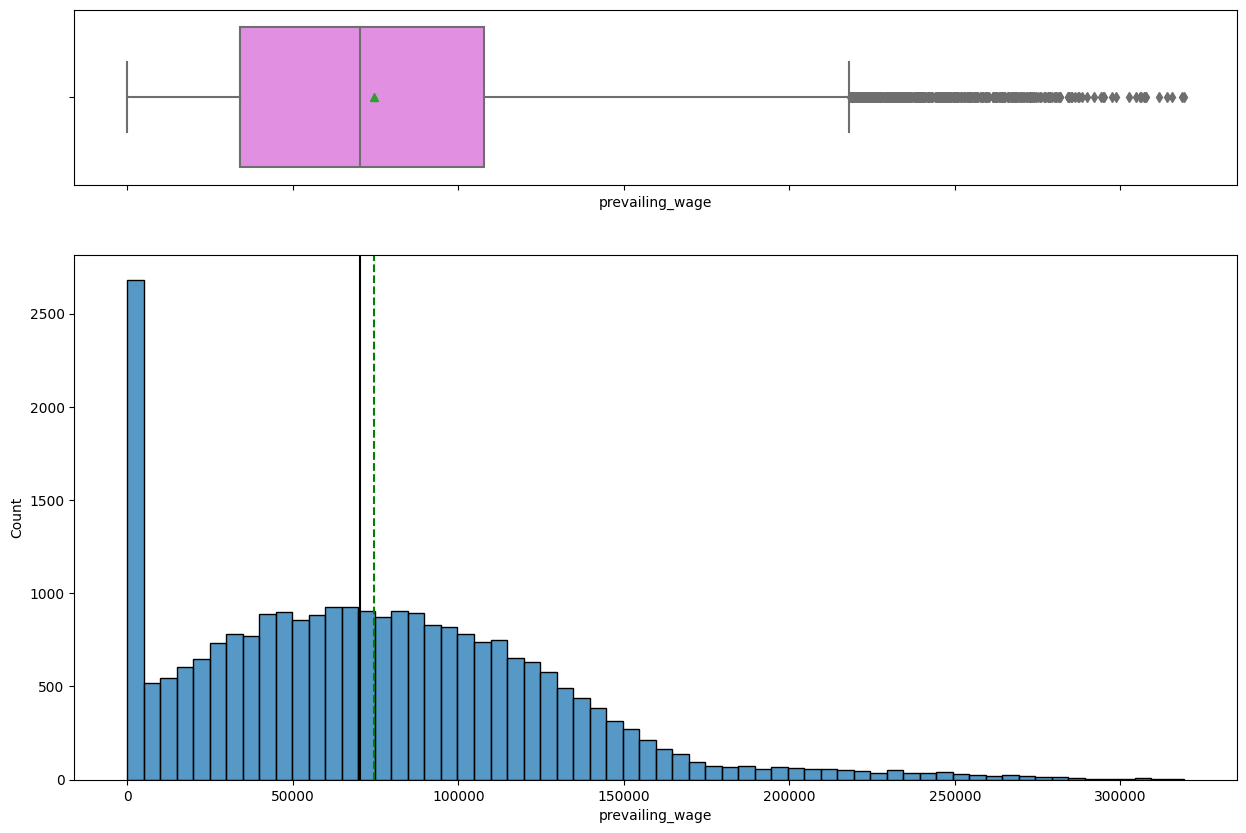

In [ ]:
# histogram & boxplot of prevailing wage
histogram_boxplot(df1, "prevailing_wage")

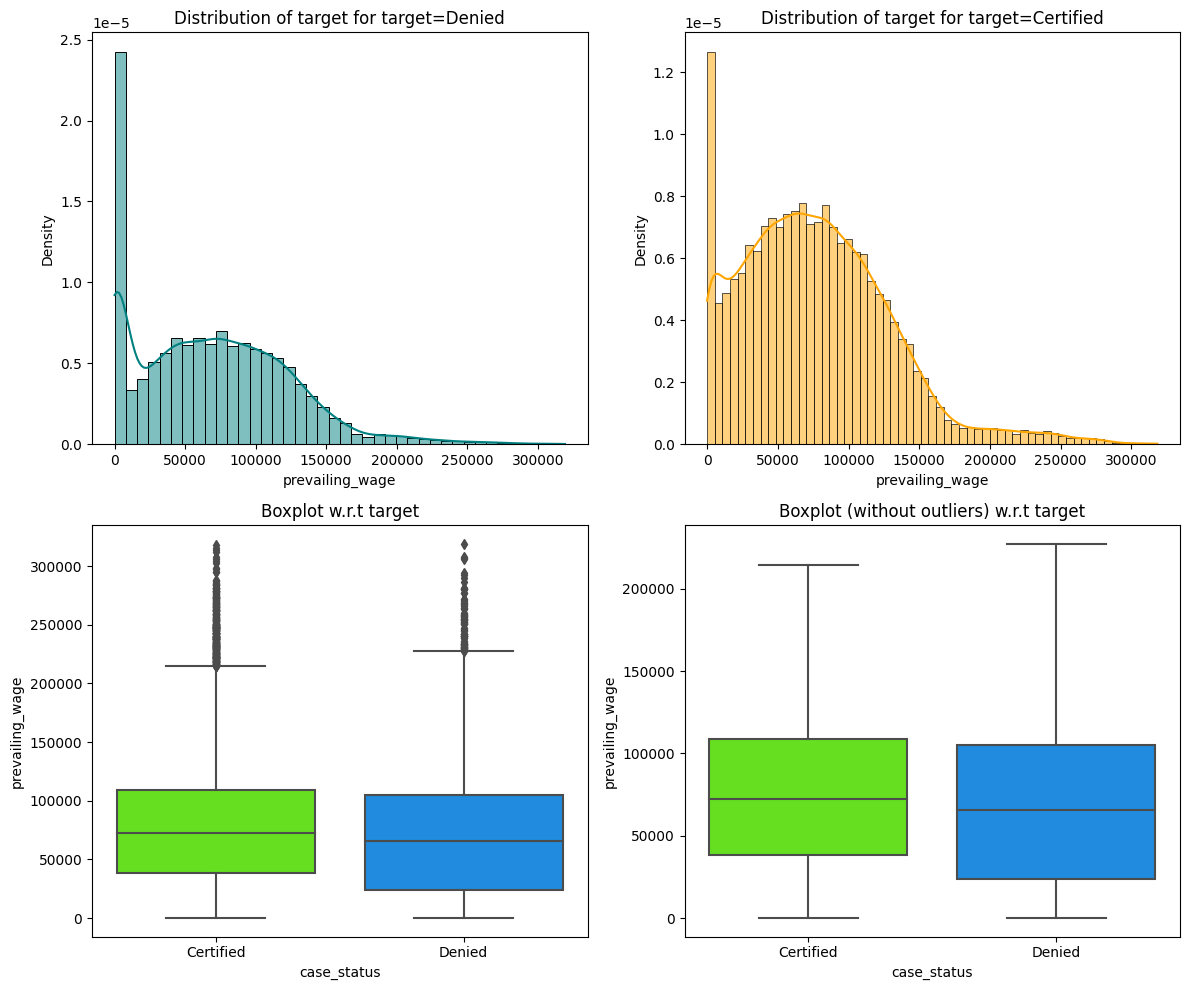

In [ ]:
# histogram & boxplots  of prevailing wage vs. target
distribution_plot_wrt_target(df1, 'prevailing_wage', 'case_status');

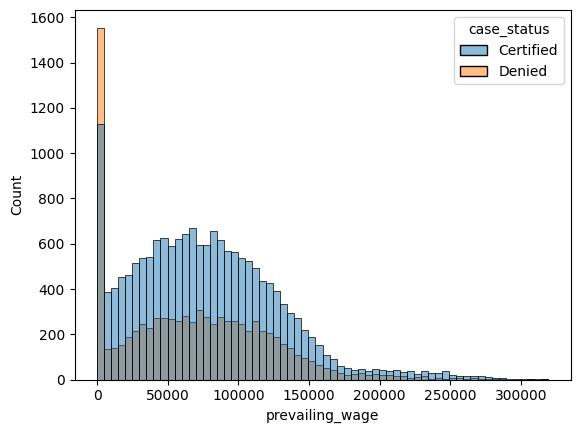

In [ ]:
sns.histplot(df1,x='prevailing_wage',hue='case_status');

Leading question: The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
- Cases are both certified and denied at all levels of prevailing wage
- More cases are denied for lower prevailing wages

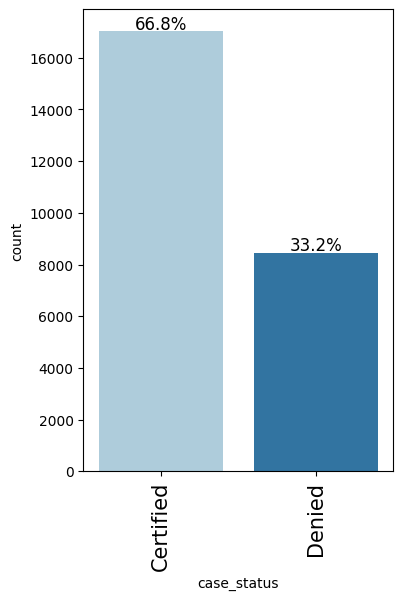

In [ ]:
# display labeled barplot of target variable
labeled_barplot(df1, 'case_status', perc=True);

- ~ 67% of the dataset are certified cases

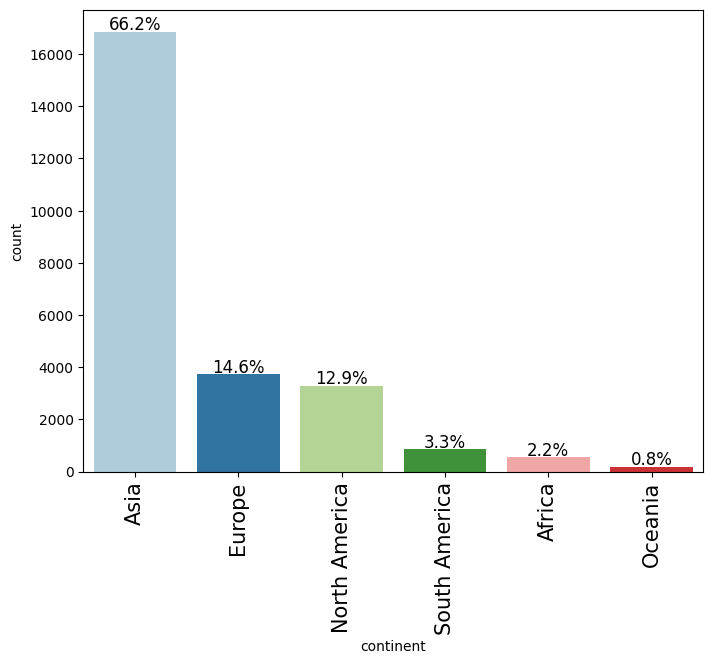

In [ ]:
# display labeled barplot of continent
labeled_barplot(df1, 'continent', perc=True);

- Asia, Europe, and North America make up more than 93% of the data

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


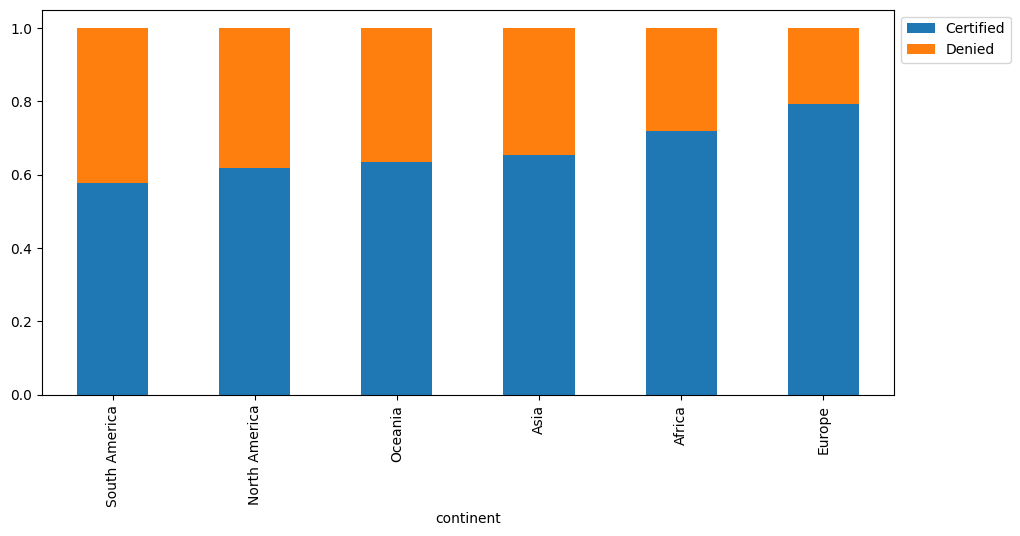

In [ ]:
# stacked barplot of contitent vs. target
stacked_barplot(df1, "continent", "case_status");

Leading question: How does the visa status vary across different continents?
- South America is denied the most often, and Europe the least often

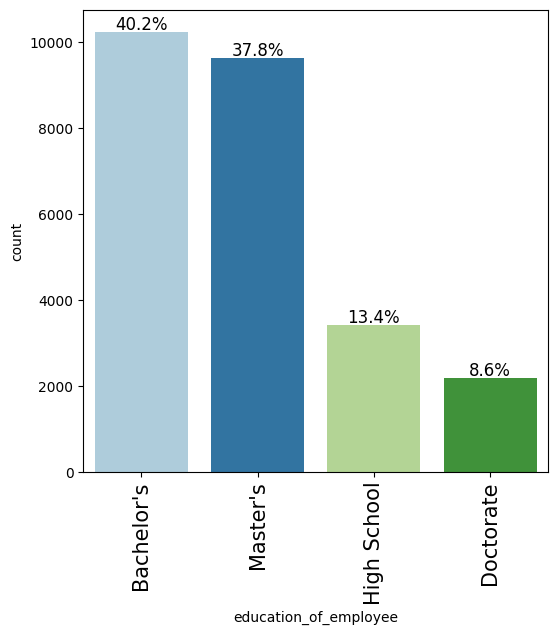

In [ ]:
# display labeled barplot of education
labeled_barplot(df1, 'education_of_employee', perc=True);

- Higher education is a majority of the dataset, with only 13.4% not obtaining some level of college education

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


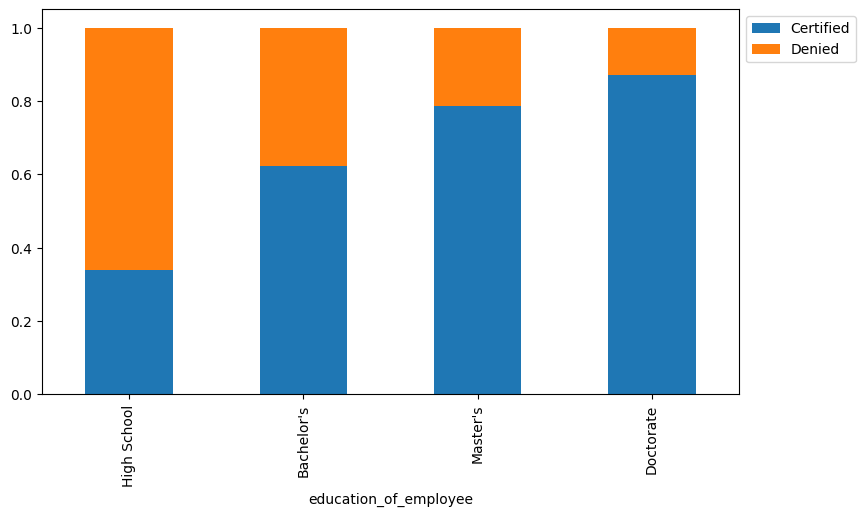

In [ ]:
# stacked barplot of education vs. target
stacked_barplot(df1, "education_of_employee", "case_status");

Leading quesiton: Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
- A higher level of eduation increases the likelihood of certification

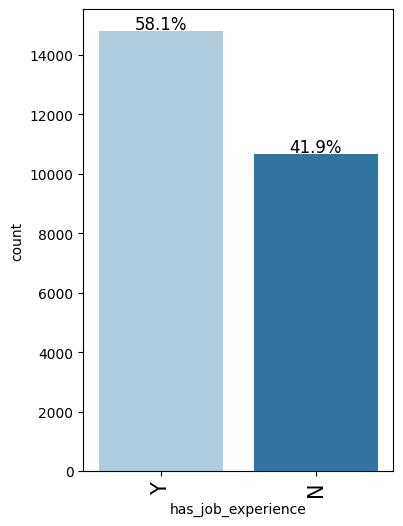

In [ ]:
# display labeled barplot of job experience
labeled_barplot(df1, 'has_job_experience', perc=True);

- ~ 58% of the dataset has job experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


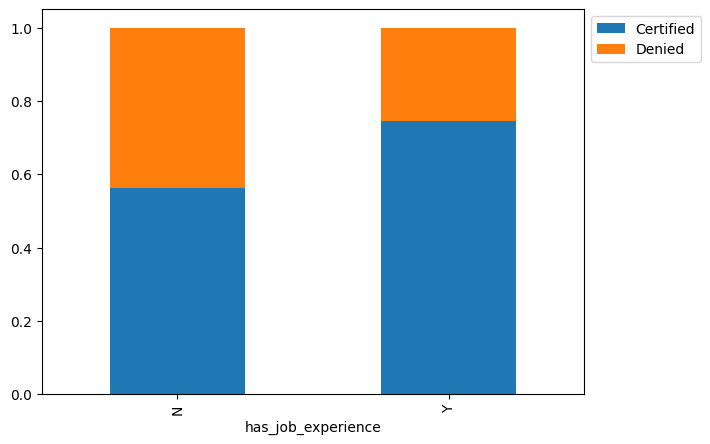

In [ ]:
# stacked barplot of job experience vs. target
stacked_barplot(df1, "has_job_experience", "case_status");

Leading question: Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
 - Work experience positively influences visa certification

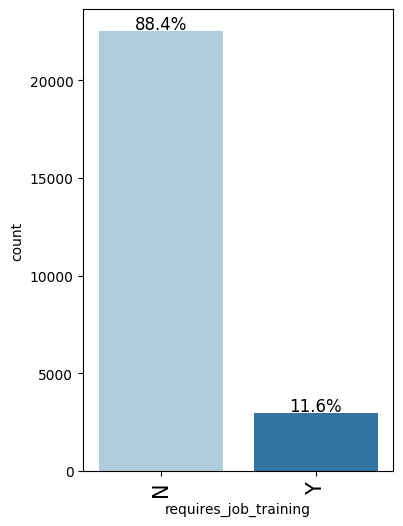

In [ ]:
# display labeled barplot of job training
labeled_barplot(df1, 'requires_job_training', perc=True);

- Over 88% of the dataset are employees that do not require job training

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


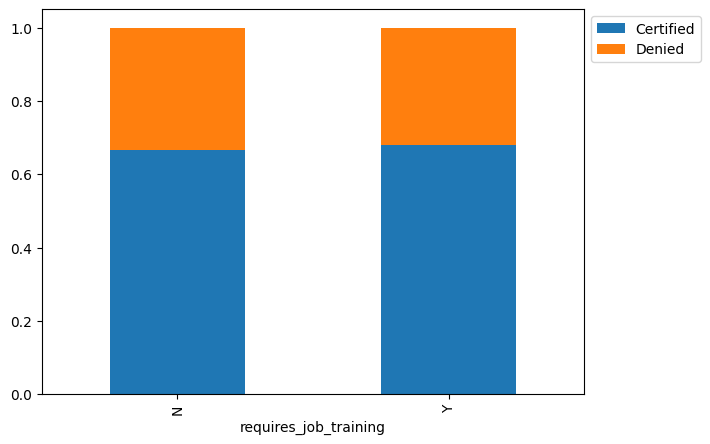

In [ ]:
# stacked barplot of job training vs. target
stacked_barplot(df1, "requires_job_training", "case_status");

has_job_experience         N      Y    All
requires_job_training                     
All                    10678  14802  25480
N                       8988  13537  22525
Y                       1690   1265   2955
------------------------------------------------------------------------------------------------------------------------


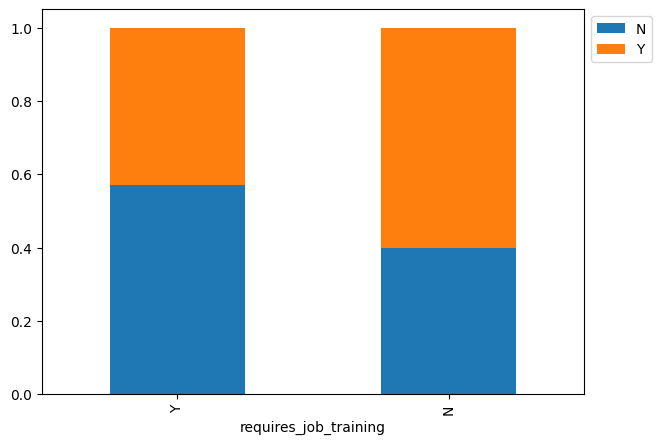

In [ ]:
# stacked barplot of job training vs. job experience
stacked_barplot(df1, "requires_job_training", "has_job_experience");

- Some employees in the dataset have job experience but still require job training

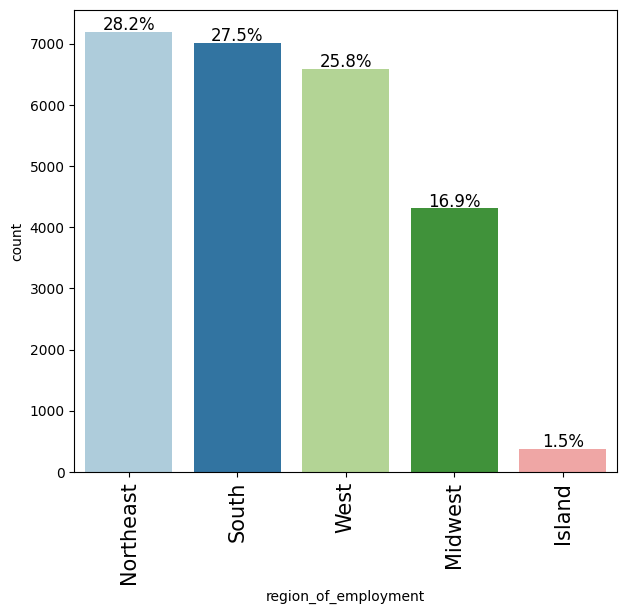

In [ ]:
# display labeled barplot of region
labeled_barplot(df1, 'region_of_employment', perc=True);

- Northest is the most intended region of employment at 28.2%
- Midwest and Island make up only 18.4% of the dataset

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


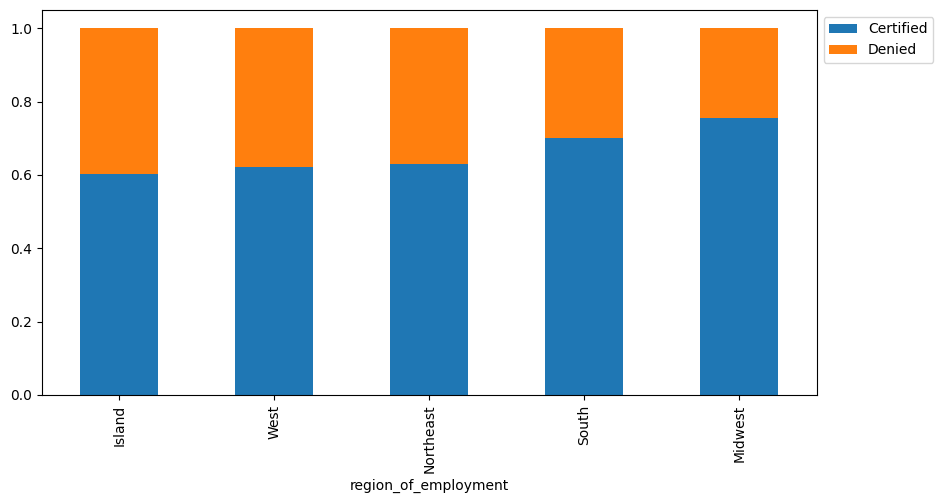

In [ ]:
# stacked barplot of education vs. target region vs. target
stacked_barplot(df1, "region_of_employment", "case_status");

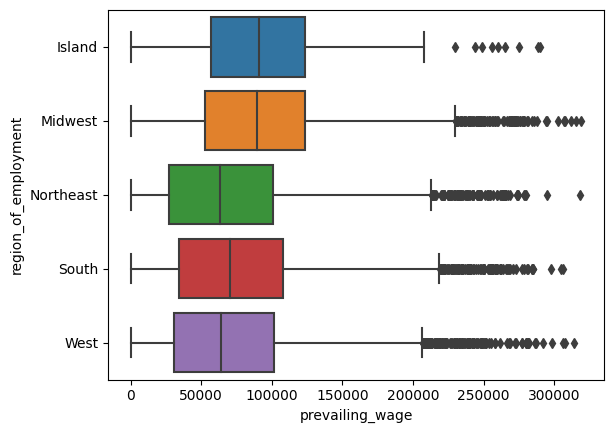

In [ ]:
# boxplot for region w prevailing wage hue
sns.boxplot(df1, y='region_of_employment', x='prevailing_wage');

- Average prevailing wage is highest in Island and Midwest regions of intended employment

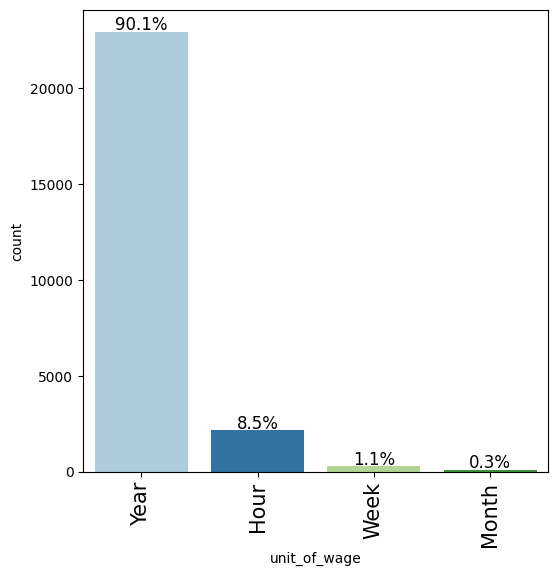

In [ ]:
# display labeled barplot of unit of wage
labeled_barplot(df1, 'unit_of_wage', perc=True);

- More than 90% of the dataset is yearly prevailing wage

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


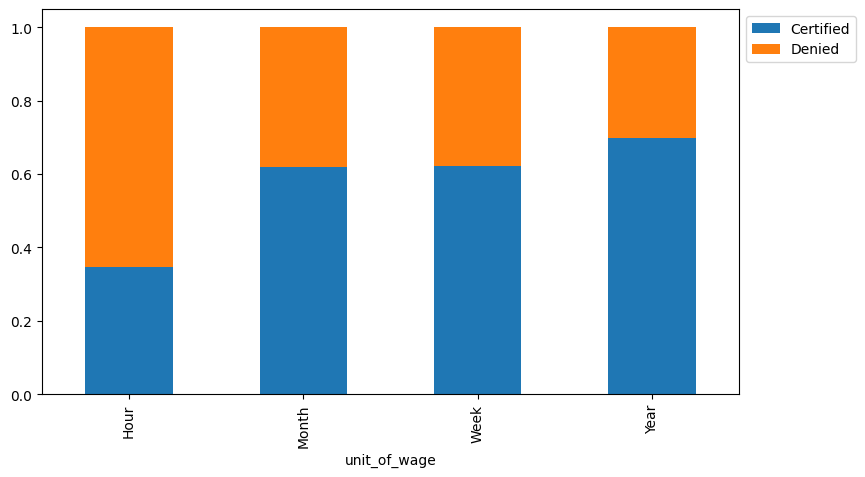

In [ ]:
# stacked barplot of wage unit vs. target
stacked_barplot(df1, "unit_of_wage", "case_status");

Leading question: In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
- Hourly earners are certified less often than all other unit of wages
- Yearly unit of wages are certified the most often

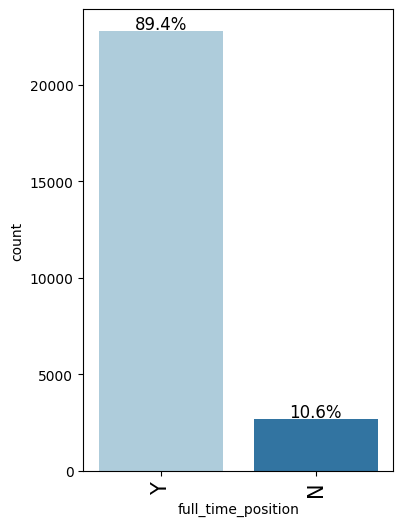

In [ ]:
# display labeled barplot of full_time_position
labeled_barplot(df1, 'full_time_position', perc=True);

- Nearly 90% of the dataset are full-time positions

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


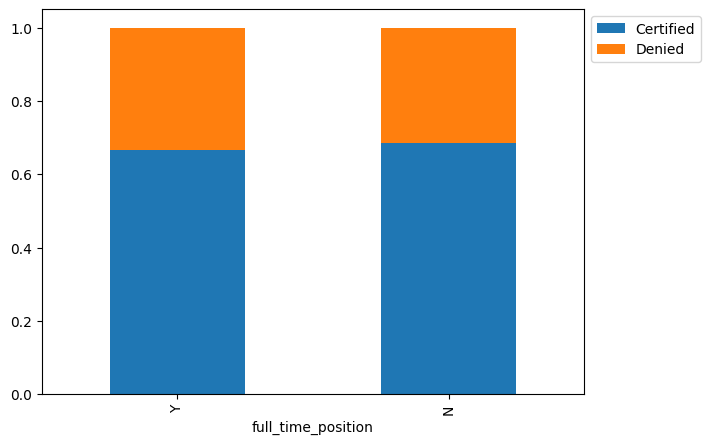

In [ ]:
# stacked barplot of full_time_position vs. target
stacked_barplot(df1, "full_time_position", "case_status");

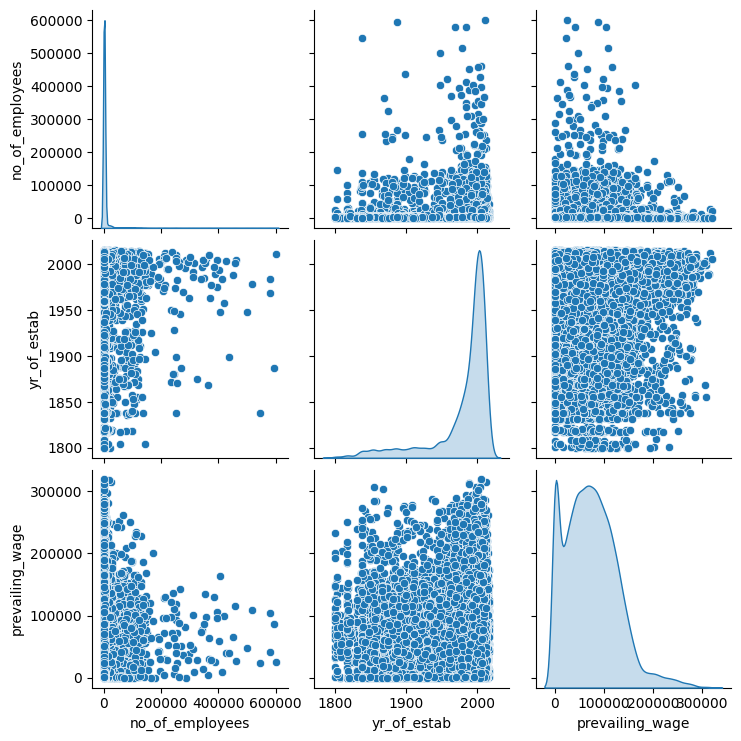

In [ ]:
# get pairplots with density on diagnal
sns.pairplot(df1, diag_kind="kde");

In [ ]:
# set numerical columns to list
num_cols = df1.select_dtypes(include=['int', 'float']).columns.tolist()

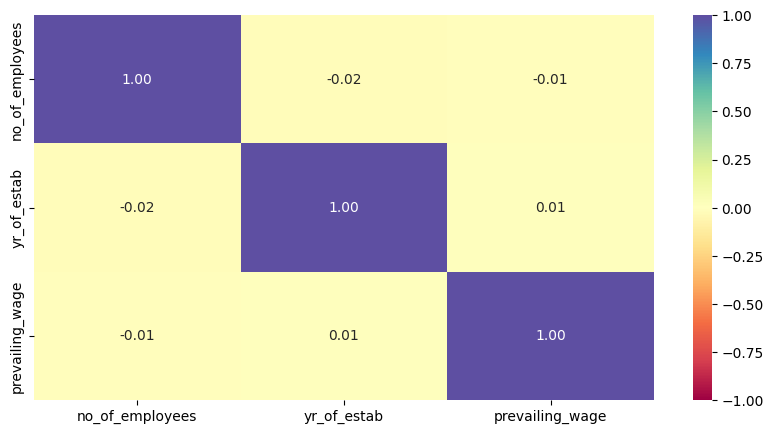

In [ ]:
# show correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show();

- There is no strong correlation between numerical data
- There is a slight negative correlation between Number of Employees and the two other numerical features

## Data Preprocessing

In [ ]:
# check null values again
df1.isna().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
# convert year of establishemnt to company age for comparison and numerical analysis
max_year = df1['yr_of_estab'].max()
df1['company_age'] = max_year - df1['yr_of_estab']

# drop year_of_estab
df1.drop(['yr_of_estab'], axis=1, inplace=True)

# check results
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
company_age,25480.0,36.590071,42.366929,0.0000,11.00,19.00,40.0000,216.00


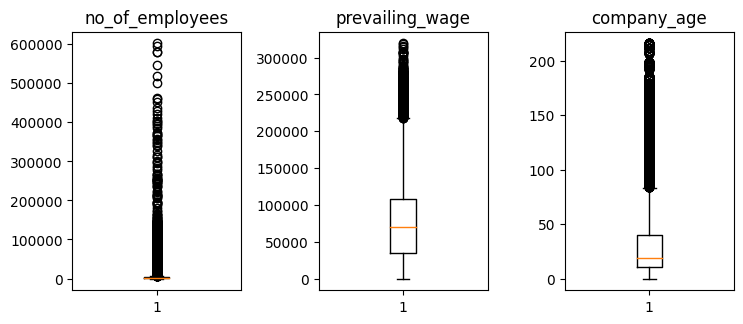

In [ ]:
# check outliers
num_cols = df1.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(10, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show();

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

In [ ]:
# convert Y to 1 and N to 0 for yes / no features
df1['has_job_experience'] = df1['has_job_experience'].map({'Y': 1, 'N': 0})
df1['requires_job_training'] = df1['requires_job_training'].map({'Y': 1, 'N': 0})
df1['full_time_position'] = df1['full_time_position'].map({'Y': 1, 'N': 0})

In [ ]:
# rank the level of education
rank_edu = {"education_of_employee": {"High School": 1, "Bachelor's": 2, "Master's": 3, "Doctorate": 4}}
df1 = df1.replace(rank_edu)

## After treatment EDA

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   region_of_employment   25480 non-null  category
 6   prevailing_wage        25480 non-null  float64 
 7   unit_of_wage           25480 non-null  category
 8   full_time_position     25480 non-null  category
 9   case_status            25480 non-null  category
 10  company_age            25480 non-null  int64   
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


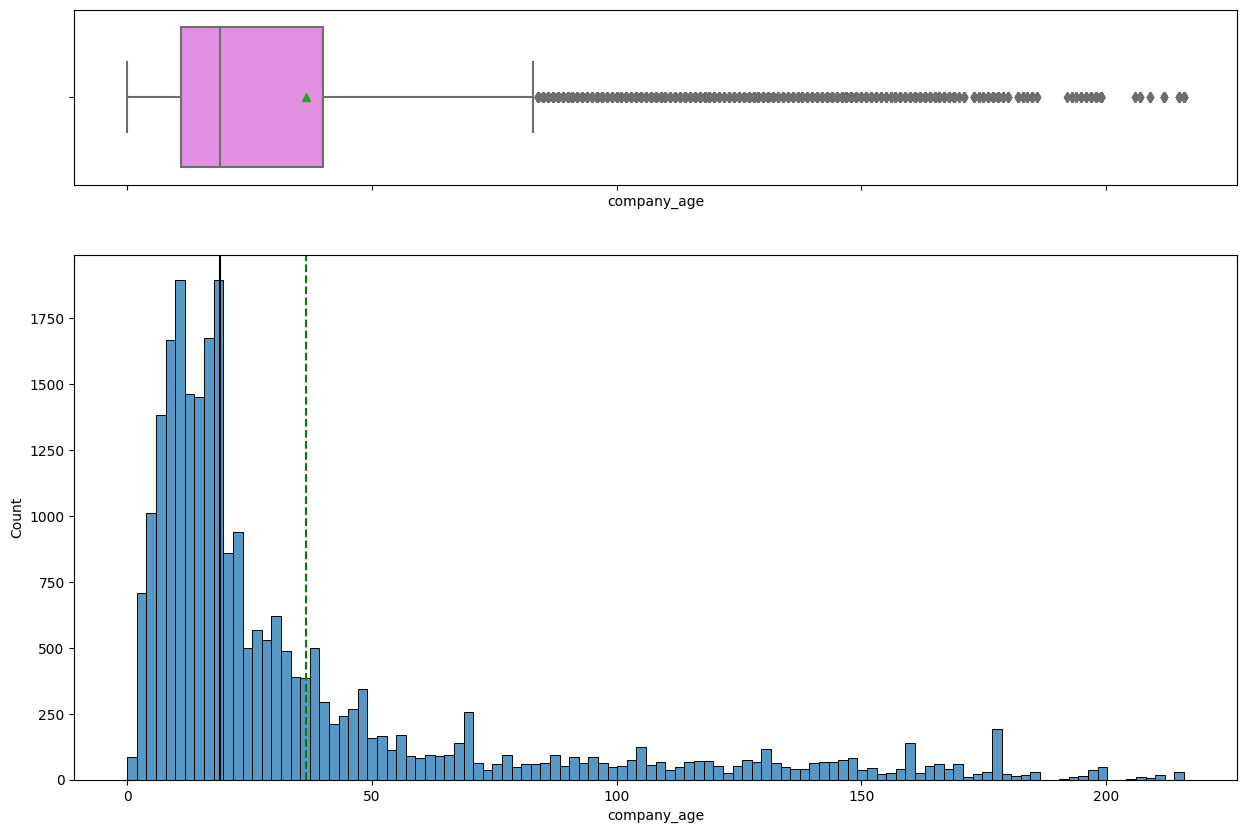

In [ ]:
# histogram boxplot of company age
histogram_boxplot(df1,'company_age');

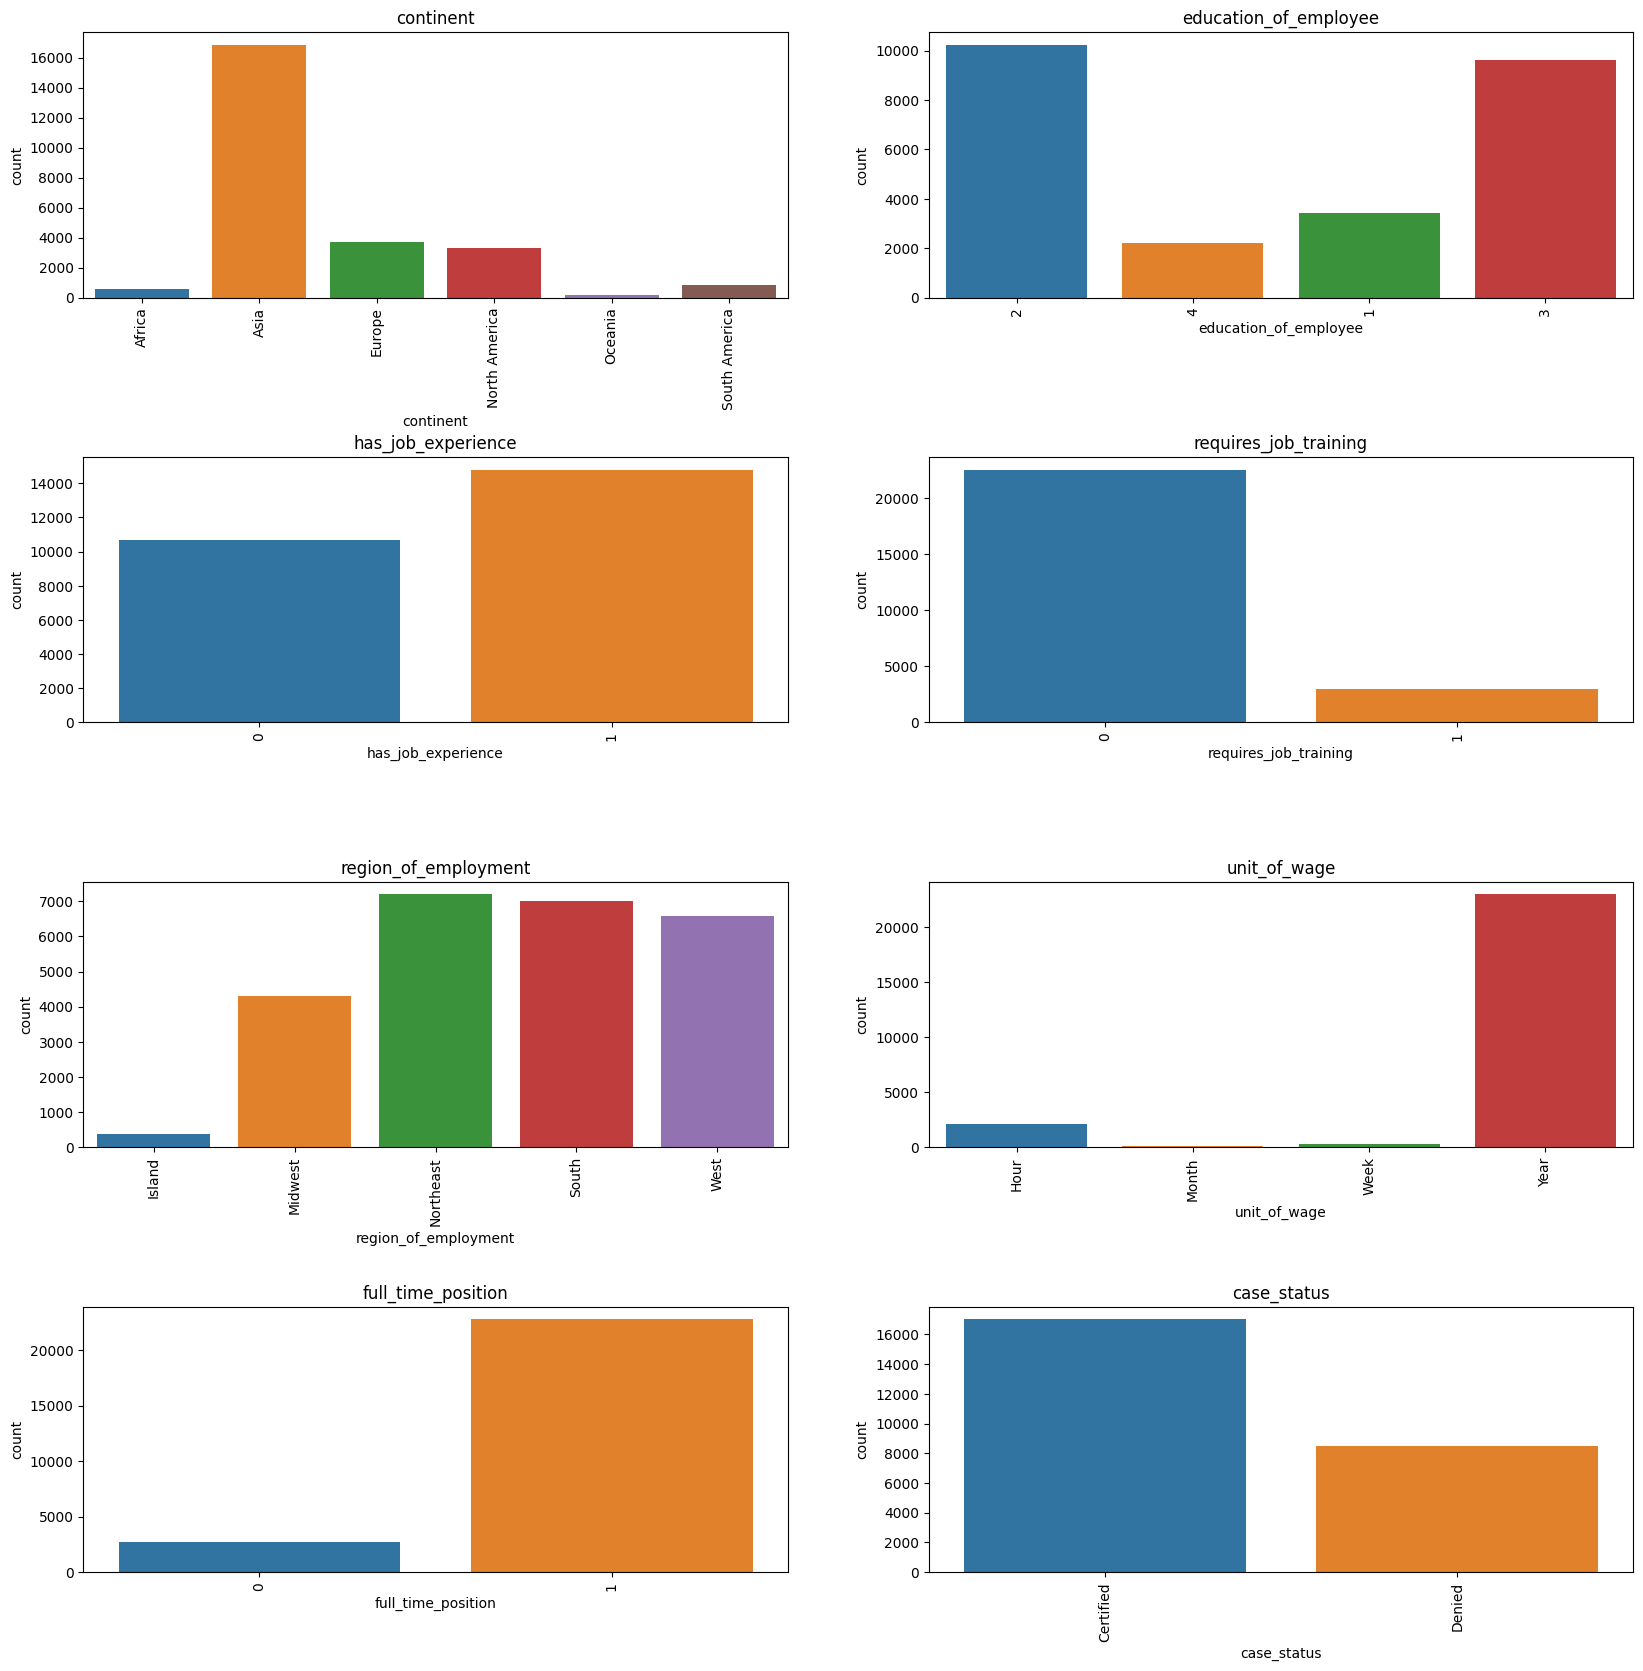

In [ ]:
# show countplots of categorical data

# get categorical columns to a list
cat_cols = df1.select_dtypes(include=['category']).columns

# create grid of subplots
num_cols_per_row = 2  # Number of categorical columns to display in each row
num_rows = (len(cat_cols) + num_cols_per_row - 1) // num_cols_per_row

fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(10*num_cols_per_row, 5*num_rows),
                        gridspec_kw={'hspace': 0.6})

# iterate over categorical columns and plot countplots
for i, cat_col in enumerate(cat_cols):
    row_idx = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    sns.countplot(data=df1, x=cat_col, ax=axs[row_idx, col_idx])
    axs[row_idx, col_idx].set_title(cat_col)
    axs[row_idx, col_idx].tick_params(axis='x', rotation=90);

# remove empty plots from display
for i in range(len(cat_cols), num_rows * num_cols_per_row):
    row_idx = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    axs[row_idx, col_idx].axis('off');

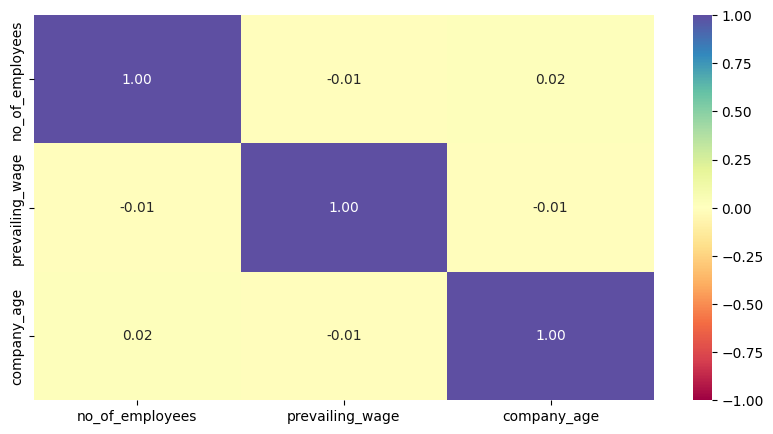

In [ ]:
# display correlation heatmap
# set numerical columns to list
num_cols = df1.select_dtypes(include=['int', 'float']).columns.tolist()

# show correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show();

- There is no strong correlation between numerical data
- There is a slight negative correlation between prevailing wage and the other two numerical columns

## Data Preparation

In [ ]:
# set case status to binary
df1["case_status"] = df1["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# set target to X and drop from Y
X = df1.drop(['case_status'],axis=1)
y = df1['case_status']

# get dummy variables
X = pd.get_dummies(X,drop_first=True)

# split data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

# display results
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


In [ ]:
# functions to calculate metrics
# data source: MLS_HR_Attrition_ET+-+DSBA.ipynb

# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

# confusion matrix function
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Models

### Balanced Decision Tree

In [ ]:
# define decision tree classifier using balnced weights to reduce false neagtives
dec_tree = DecisionTreeClassifier(criterion='gini', class_weight='balanced', random_state=1)

# fit decision tree classifier on train data
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

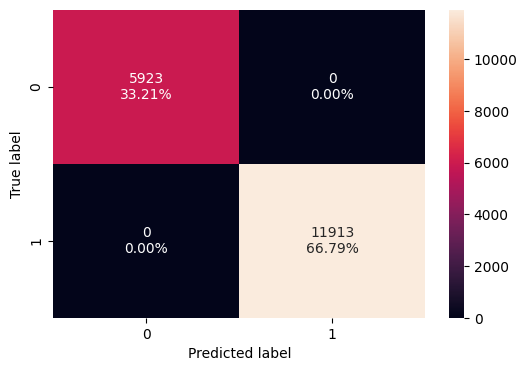

In [ ]:
# display confusion matrix
confusion_matrix_sklearn(dec_tree, X_train, y_train)

Confusion Matrix:
- Visa certified and the model predicted it correctly:  True Positive (observed=1,predicted=1)

- Visa denied and model predicted certification: False Positive (observed=0,predicted=1)

- Visa denied and model predicted it correctly: True Negative (observed=0,predicted=0)

- Visa certified and model predicted denial: False Negative (observed=1,predicted=0)

In [ ]:
# performance on training data
dec_tree_model_train_perf = model_performance_classification_sklearn(dec_tree, X_train, y_train)
print("Training performance \n",dec_tree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


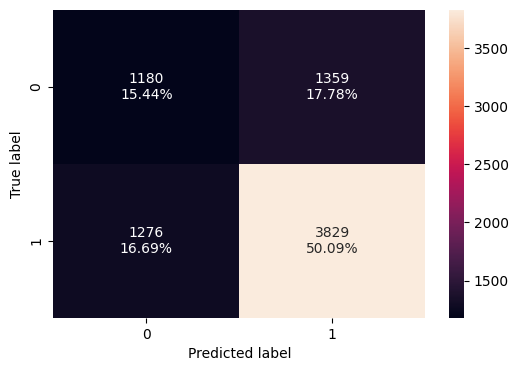

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(dec_tree, X_test, y_test)

In [ ]:
# perforamnce on training data
dec_tree_model_test_perf = model_performance_classification_sklearn(dec_tree, X_test, y_test)
print("Training performance \n",dec_tree_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.655285  0.750049   0.738049  0.744001


- Decision tree is overfitting and is not able to generalize well on the test data on accuracy.

In [ ]:
# display feature importance
print(pd.DataFrame(dec_tree.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
prevailing_wage                   0.268134
no_of_employees                   0.237807
company_age                       0.172061
education_of_employee_1           0.073290
has_job_experience_1              0.054897
education_of_employee_3           0.026506
education_of_employee_4           0.020831
continent_Europe                  0.019812
region_of_employment_Midwest      0.017152
requires_job_training_1           0.016685
full_time_position_1              0.015938
region_of_employment_South        0.014482
region_of_employment_Northeast    0.013472
region_of_employment_West         0.012206
continent_Asia                    0.010893
continent_North America           0.009267
continent_South America           0.006751
unit_of_wage_Year                 0.004223
continent_Oceania                 0.002844
unit_of_wage_Week                 0.001842
unit_of_wage_Month                0.000908


###  Tuned Decision Tree

In [ ]:
# set classifier again to balanced
dec_tree_tuned = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# parameter grid
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# set type scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run  grid search
grid_obj = GridSearchCV(dec_tree_tuned, parameters, scoring=scorer)

grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
dec_tree_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data.
dec_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

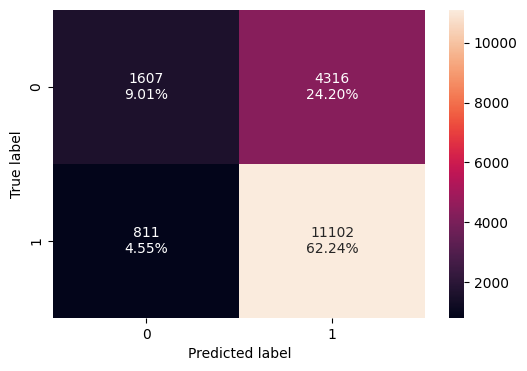

In [ ]:
# display confusion matrix
confusion_matrix_sklearn(dec_tree_tuned, X_train, y_train)

In [ ]:
# show stats on training data
dec_tree_tuned_model_train_perf = model_performance_classification_sklearn(dec_tree_tuned, X_train,y_train)
print("Training performance \n",dec_tree_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


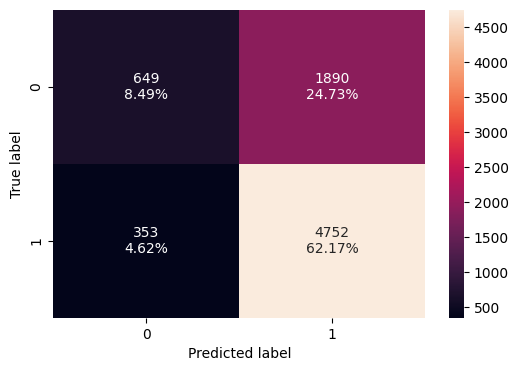

In [ ]:
# display confusion matrix on test data
confusion_matrix_sklearn(dec_tree_tuned, X_test,y_test)

In [ ]:
# show results on test data
dec_tree_tuned_model_test_perf = model_performance_classification_sklearn(dec_tree_tuned, X_test, y_test)
print("Testing performance \n",dec_tree_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


- Overfitting has been reduced and all metrics except precision have improved
- F1 of 0.80 better with tuned model
- The tuned decision tree model is a better performing model

In [ ]:
# display feature importance
print(pd.DataFrame(dec_tree_tuned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
education_of_employee_1                1.0
no_of_employees                        0.0
has_job_experience_1                   0.0
unit_of_wage_Year                      0.0
unit_of_wage_Week                      0.0
unit_of_wage_Month                     0.0
region_of_employment_West              0.0
region_of_employment_South             0.0
region_of_employment_Northeast         0.0
region_of_employment_Midwest           0.0
requires_job_training_1                0.0
education_of_employee_3                0.0
prevailing_wage                        0.0
education_of_employee_4                0.0
continent_South America                0.0
continent_Oceania                      0.0
continent_North America                0.0
continent_Europe                       0.0
continent_Asia                         0.0
company_age                            0.0
full_time_position_1                   0.0


- The tuned model is based on only one feature, High School Education

##  Bagging Models

#### Bagging Classifier

In [ ]:
# define and fiot the bagging classifier
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

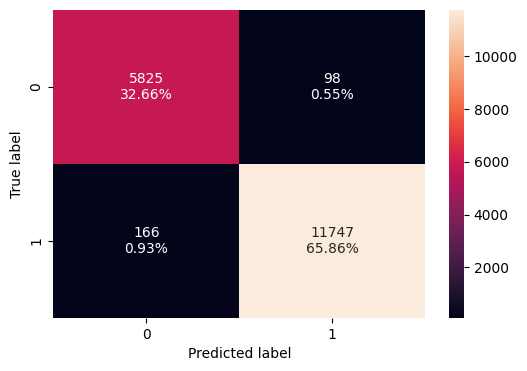

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(bagging_classifier, X_train,y_train)

In [ ]:
# performance metrics on train data
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train,y_train)
print("Training performance \n",bagging_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.986066   0.991726  0.988888


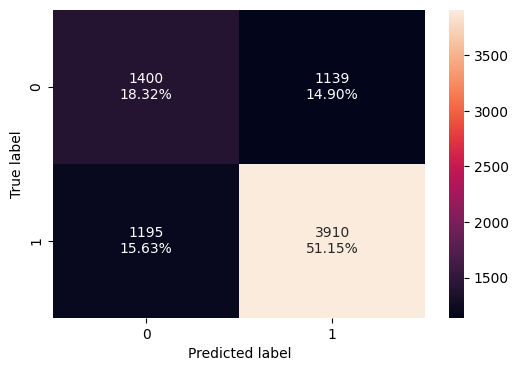

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(bagging_classifier, X_test,y_test)

In [ ]:
# performance metrics on test data
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
print("Testing performance \n",bagging_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.694662  0.765916   0.774411  0.77014


- Bagging model is overfitting but test data performance is pretty good with F1 ~ 0.77

#### Tuned Bagging Classifier

In [ ]:
# grid search for bagging classifier
bagging_classifier_tuned = BaggingClassifier(random_state=1)

# set parameter grid
param_grid = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# set type scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run grid search
grid_obj = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
bagging_classifier_tuned  = grid_obj.best_estimator_

# fit the best algorithm to the data.
bagging_classifier_tuned.fit(X_train,y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

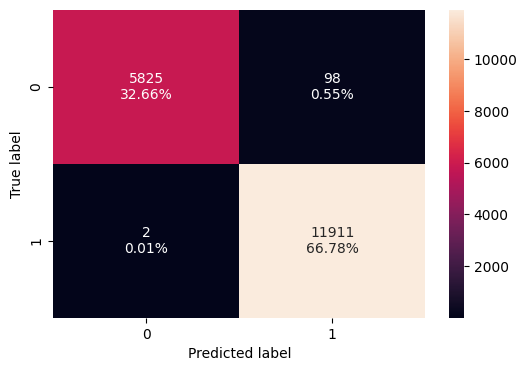

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(bagging_classifier_tuned, X_train,y_train)

In [ ]:
# performance metrics on train data
bagging_classifier_tuned_model_train_perf = model_performance_classification_sklearn(bagging_classifier_tuned, X_train,y_train)
print("Training performance \n",bagging_classifier_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.994393  0.999832   0.991839  0.99582


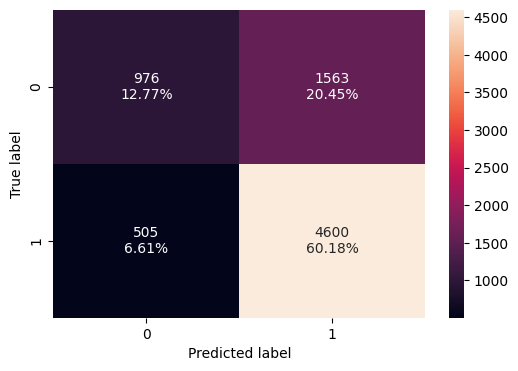

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(bagging_classifier_tuned, X_test,y_test)

In [ ]:
# performance metrics on test data
bagging_classifier_tuned_model_test_perf = model_performance_classification_sklearn(bagging_classifier_tuned, X_test, y_test)
print("Testing performance \n",bagging_classifier_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.729461  0.901077    0.74639  0.816471


- Tuned bagging model is still overfitting but accuracy, recall and F1 improved
- F1 of ~ 0.82 is much improved

###  Random Forest Models

### Balanced Random Forest Model

In [ ]:
# define and fit the model
rf_classifier=RandomForestClassifier(class_weight = 'balanced',random_state=1)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

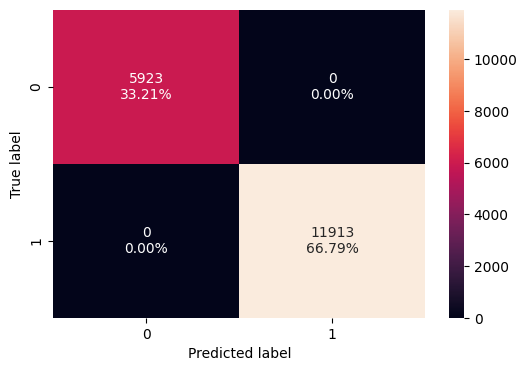

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(rf_classifier, X_train,y_train)

In [ ]:
# performance metrics on train data
rf_classifier_model_train_perf = model_performance_classification_sklearn(rf_classifier, X_train,y_train)
print("Training performance \n",rf_classifier_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


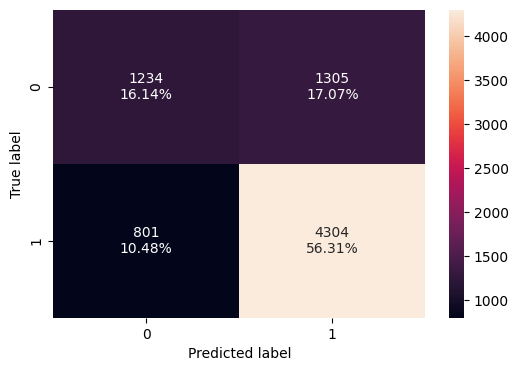

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(rf_classifier, X_test,y_test)

In [ ]:
# performance metrics on test data
rf_classifier_model_test_perf = model_performance_classification_sklearn(rf_classifier, X_test, y_test)
print("Testing performance \n",rf_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.72449  0.843095   0.767338  0.803435


- Model is overfitting but metrics on test data are good, with F1 score ~ 0.80

In [ ]:
# display feature importance
print(pd.DataFrame(rf_classifier.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
prevailing_wage                   0.259407
no_of_employees                   0.234418
company_age                       0.189664
education_of_employee_1           0.065500
has_job_experience_1              0.051626
education_of_employee_3           0.041230
education_of_employee_4           0.022074
continent_Europe                  0.017048
unit_of_wage_Year                 0.015521
requires_job_training_1           0.014823
full_time_position_1              0.014703
region_of_employment_Midwest      0.011663
continent_Asia                    0.011567
region_of_employment_West         0.010168
region_of_employment_Northeast    0.009846
region_of_employment_South        0.009777
continent_North America           0.009408
continent_South America           0.005922
continent_Oceania                 0.002449
unit_of_wage_Week                 0.002064
unit_of_wage_Month                0.001121


### Tuned Random Forest Model

In [ ]:
# set type of classifier.
rf_classifier_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

# set parameters grid
parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}


# set scoring to use
scorer = metrics.make_scorer(metrics.f1_score)

# run grid search
grid_obj = GridSearchCV(rf_classifier_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_classifier_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=25,
                       oob_score=True, random_state=1)

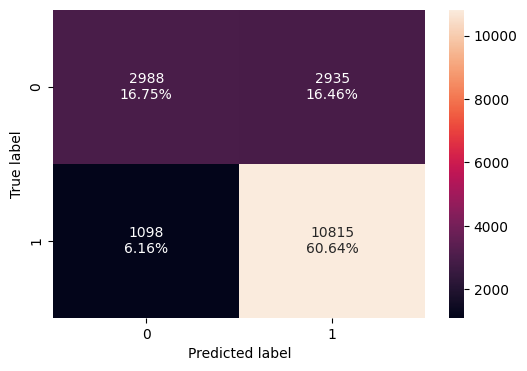

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(rf_classifier_tuned, X_train,y_train)

In [ ]:
# performance metrics on train data
rf_classifier_tuned_model_train_perf = model_performance_classification_sklearn(rf_classifier_tuned, X_train,y_train)
print("Training performance \n",rf_classifier_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.773884  0.907832   0.786545  0.842848


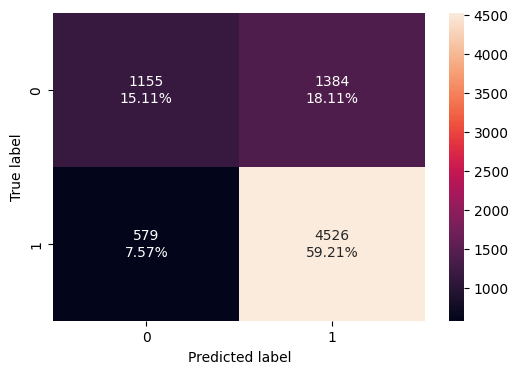

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(rf_classifier_tuned, X_test,y_test)

In [ ]:
# performance metrics on test data
rf_classifier_tuned_model_test_perf = model_performance_classification_sklearn(rf_classifier_tuned, X_test, y_test)
print("Testing performance \n",rf_classifier_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.743197  0.886582   0.765821  0.821788


- The tuned random forest model is overfitting much less than the un-tuned model
- Exceptin presicion, which is slightly lower, all performance metrics improved on test data in the tuned model
- F1 score of ~ 0.82 is better in the tuned model

In [ ]:
# display feature importance
print(pd.DataFrame(rf_classifier_tuned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
education_of_employee_1           0.239545
prevailing_wage                   0.147533
has_job_experience_1              0.119699
education_of_employee_3           0.083328
no_of_employees                   0.072826
company_age                       0.058537
unit_of_wage_Year                 0.048575
continent_Europe                  0.044488
education_of_employee_4           0.044055
region_of_employment_Midwest      0.024187
region_of_employment_West         0.019218
continent_Asia                    0.016419
continent_North America           0.014449
region_of_employment_South        0.014045
full_time_position_1              0.012993
requires_job_training_1           0.012136
region_of_employment_Northeast    0.011627
continent_South America           0.008289
continent_Oceania                 0.002958
unit_of_wage_Week                 0.002931
unit_of_wage_Month                0.002161


## Boosting Models

### AdaBoost Classifier

In [ ]:
# fit adaboost classifier on train data
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

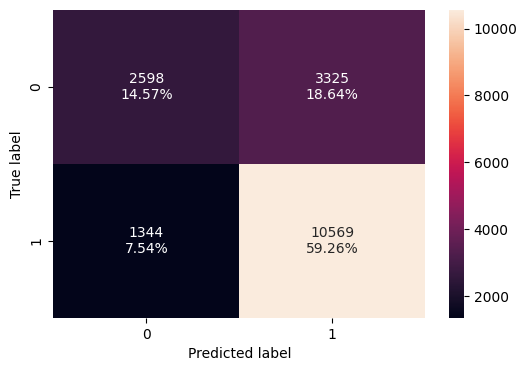

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(ab_classifier, X_train,y_train)

In [ ]:
# performance metrics on train data
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


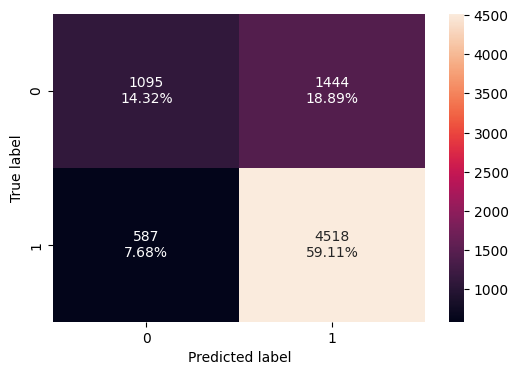

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(ab_classifier, X_test,y_test)

In [ ]:
# performance metrics on test data
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
print("Testing performance \n",ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


- The model is not overfitting and is performing resonably well with an F1 score of ~ 0.82

In [ ]:
# display feature importance
print(pd.DataFrame(ab_classifier.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
prevailing_wage                       0.36
no_of_employees                       0.24
company_age                           0.08
education_of_employee_3               0.06
education_of_employee_1               0.04
region_of_employment_Midwest          0.04
continent_Europe                      0.02
continent_North America               0.02
unit_of_wage_Week                     0.02
region_of_employment_West             0.02
region_of_employment_South            0.02
full_time_position_1                  0.02
has_job_experience_1                  0.02
education_of_employee_4               0.02
continent_South America               0.02
continent_Asia                        0.00
region_of_employment_Northeast        0.00
unit_of_wage_Month                    0.00
continent_Oceania                     0.00
unit_of_wage_Year                     0.00
requires_job_training_1               0.00


### Tuned AdaBoost Classifier

In [ ]:
# set classifier ttype
ab_classifier_tuned = AdaBoostClassifier(random_state=1)

# parameter grid
parameters = {
    # use two different depths
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# set scring type
scorer = metrics.make_scorer(metrics.f1_score)

# run grid search
grid_obj = GridSearchCV(ab_classifier_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set classifier to best estimator and fit to train data
ab_classifier_tuned = grid_obj.best_estimator_
ab_classifier_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

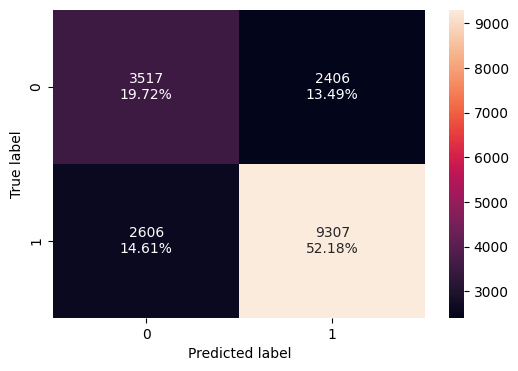

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(ab_classifier_tuned, X_train,y_train)

In [ ]:
# performance metrics on train data
ab_classifier_tuned_model_train_perf = model_performance_classification_sklearn(ab_classifier_tuned, X_train,y_train)
print("Training performance \n",ab_classifier_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.718995  0.781247   0.794587  0.787861


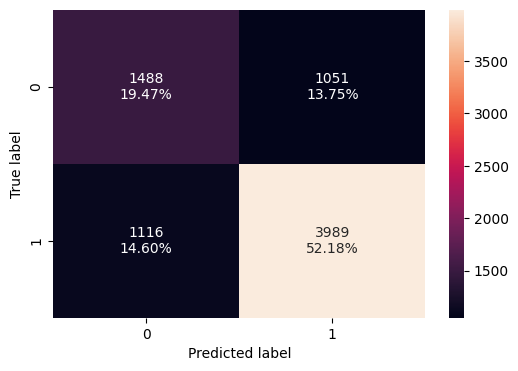

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(ab_classifier_tuned, X_test,y_test)

In [ ]:
# performance metrics on test data
ab_classifier_tuned_model_test_perf = model_performance_classification_sklearn(ab_classifier_tuned, X_test, y_test)
print("Testing performance \n",ab_classifier_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.71651  0.781391   0.791468  0.786397


- The tuned model is not overfitting but the un-tuned model has better F1 and recall performance

In [ ]:
# display feature importance
print(pd.DataFrame(ab_classifier_tuned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
has_job_experience_1                  0.17
education_of_employee_3               0.15
education_of_employee_1               0.14
education_of_employee_4               0.13
region_of_employment_Midwest          0.11
continent_Europe                      0.10
prevailing_wage                       0.08
region_of_employment_South            0.07
unit_of_wage_Year                     0.04
region_of_employment_West             0.01
unit_of_wage_Week                     0.00
unit_of_wage_Month                    0.00
region_of_employment_Northeast        0.00
no_of_employees                       0.00
requires_job_training_1               0.00
continent_South America               0.00
continent_Oceania                     0.00
continent_North America               0.00
continent_Asia                        0.00
company_age                           0.00
full_time_position_1                  0.00


### Gradient Boosting Classifier

In [ ]:
# fit gradient boosting classifier on train data
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

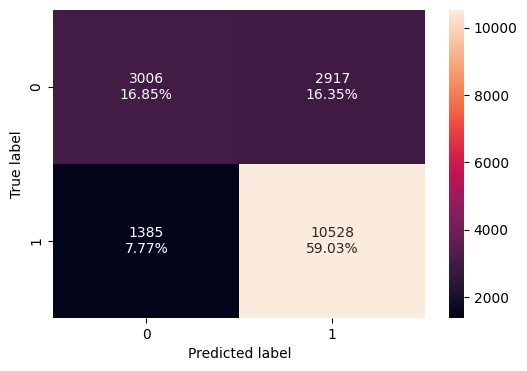

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(gb_classifier, X_train,y_train)

In [ ]:
# performance metrics on train data
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train,y_train)
print("Training performance \n",gb_classifier_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


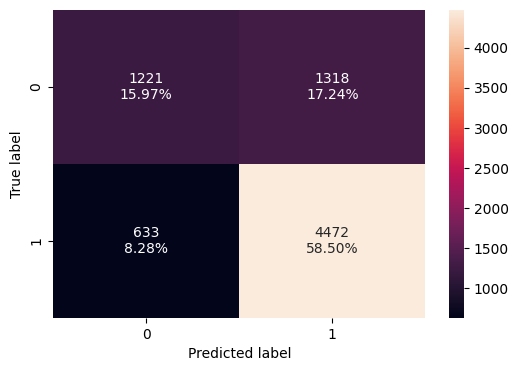

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(gb_classifier, X_test,y_test)

In [ ]:
# performance metrics on test data
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
print("Testing performance \n",gb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


- The model is not overfitting and is performing resonably well with an F1 score of ~ 0.82

In [ ]:
# display feature importance
print(pd.DataFrame(gb_classifier.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
education_of_employee_1           0.285978
has_job_experience_1              0.155462
prevailing_wage                   0.136663
education_of_employee_3           0.087551
education_of_employee_4           0.083538
continent_Europe                  0.063035
unit_of_wage_Year                 0.036526
region_of_employment_Midwest      0.034432
region_of_employment_South        0.019024
no_of_employees                   0.014866
continent_North America           0.014537
company_age                       0.014235
region_of_employment_West         0.013583
continent_Asia                    0.011354
full_time_position_1              0.009000
region_of_employment_Northeast    0.008039
continent_South America           0.007043
requires_job_training_1           0.004692
continent_Oceania                 0.000311
unit_of_wage_Month                0.000133
unit_of_wage_Week                 0.000000


### Tuned Gradient Boosting Classifier

In [ ]:
# set classifier type
gb_classifier_tuned = GradientBoostingClassifier(random_state=1)

# set parameter grid
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.7,0.8,0.9,1],
    "max_features": [0.7,0.8,0.9,1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# set scorer type
scorer = metrics.make_scorer(metrics.f1_score)

# run grid search
grid_obj = GridSearchCV(gb_classifier_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to be estimator and fit to train data
gb_classifier_tuned = grid_obj.best_estimator_
gb_classifier_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.9)

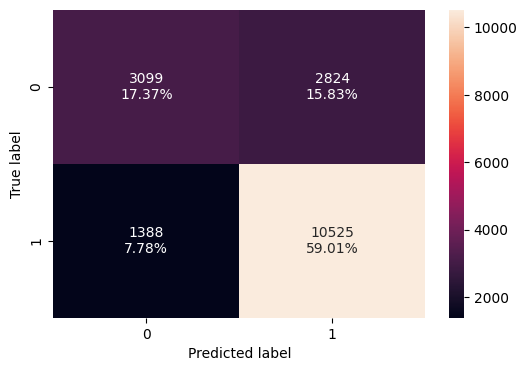

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(gb_classifier_tuned, X_train,y_train)

In [ ]:
# performance metrics on train data
gb_classifier_tuned_model_train_perf = model_performance_classification_sklearn(gb_classifier_tuned, X_train,y_train)
print("Training performance \n",gb_classifier_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.763848  0.883489   0.788449  0.833267


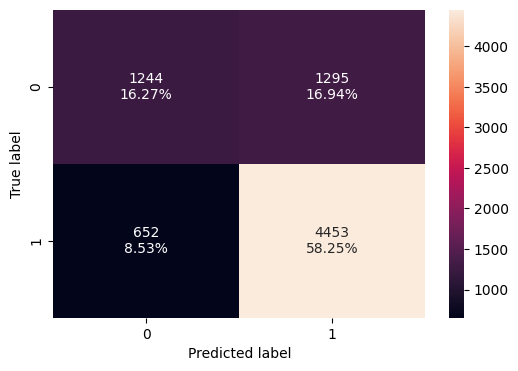

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(gb_classifier_tuned, X_test,y_test)

In [ ]:
# performance metrics on test data
gb_classifier_tuned_model_test_perf = model_performance_classification_sklearn(gb_classifier_tuned, X_test, y_test)
print("Testing performance \n",gb_classifier_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.74529  0.872282   0.774704  0.820603


- The model is not overfitting and is performing resonably well with an F1 score of ~ 0.82

In [ ]:
# display feature importance
print(pd.DataFrame(gb_classifier_tuned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
education_of_employee_1           0.251474
prevailing_wage                   0.151982
has_job_experience_1              0.145392
education_of_employee_3           0.092941
education_of_employee_4           0.080459
continent_Europe                  0.056567
no_of_employees                   0.041880
region_of_employment_Midwest      0.037379
unit_of_wage_Year                 0.032259
company_age                       0.026842
region_of_employment_South        0.018120
continent_North America           0.015088
region_of_employment_West         0.011615
continent_South America           0.009452
continent_Asia                    0.007179
requires_job_training_1           0.006986
region_of_employment_Northeast    0.005941
full_time_position_1              0.005311
continent_Oceania                 0.001696
unit_of_wage_Week                 0.000884
unit_of_wage_Month                0.000553


### XGBoost Classifier

In [ ]:
# fit xgboosting classifier on train data
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

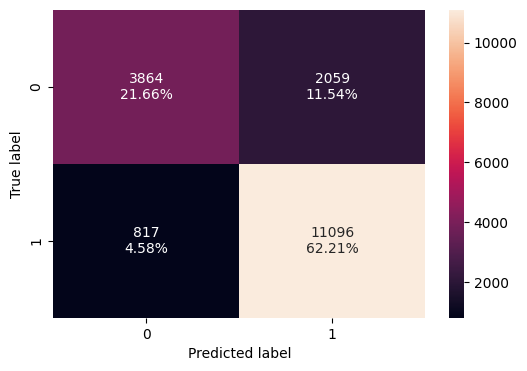

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(xgb_classifier, X_train,y_train)

In [ ]:
# performance metrics on train data
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train,y_train)
print("Training performance \n",xgb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272


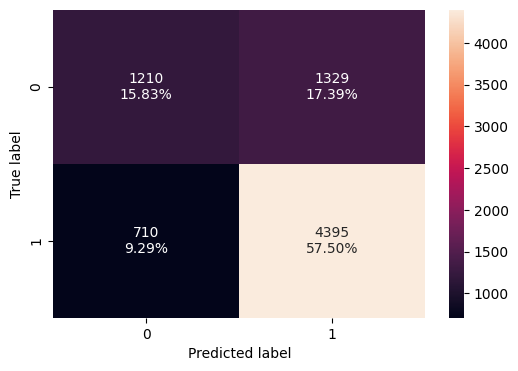

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(xgb_classifier, X_test,y_test)

In [ ]:
# performance metrics on test data
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
print("Testing performance \n",xgb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.733255  0.860921    0.76782  0.811709


- The model is overfittting and F1 score lower than other models at ~ 0.81

In [ ]:
# display feature importance
print(pd.DataFrame(xgb_classifier.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
education_of_employee_1           0.272220
education_of_employee_4           0.126113
has_job_experience_1              0.088554
continent_Europe                  0.082862
education_of_employee_3           0.061248
region_of_employment_Midwest      0.046815
unit_of_wage_Year                 0.039491
region_of_employment_South        0.036837
full_time_position_1              0.035373
continent_South America           0.024389
requires_job_training_1           0.022184
continent_North America           0.021058
region_of_employment_West         0.019642
continent_Asia                    0.018652
prevailing_wage                   0.018163
unit_of_wage_Month                0.016767
region_of_employment_Northeast    0.016000
unit_of_wage_Week                 0.015273
no_of_employees                   0.013677
company_age                       0.013121
continent_Oceania                 0.011564


### Tuned XGBoost Classifier

In [ ]:
# set classifier type
xgb_classifier_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# parameter grid
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1],
}

# set scoring type
scorer = metrics.make_scorer(metrics.f1_score)

# run grid search
grid_obj = GridSearchCV(xgb_classifier_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set classifier to best setimate and fit to train data
xgb_classifier_tuned = grid_obj.best_estimator_
xgb_classifier_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

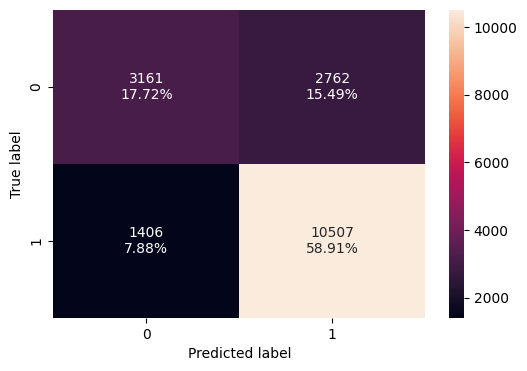

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(xgb_classifier_tuned, X_train,y_train)

In [ ]:
# performance metrics on train data
xgb_classifier_tuned_model_train_perf = model_performance_classification_sklearn(xgb_classifier_tuned, X_train,y_train)
print("Training performance \n",xgb_classifier_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.766315  0.881978   0.791846  0.834485


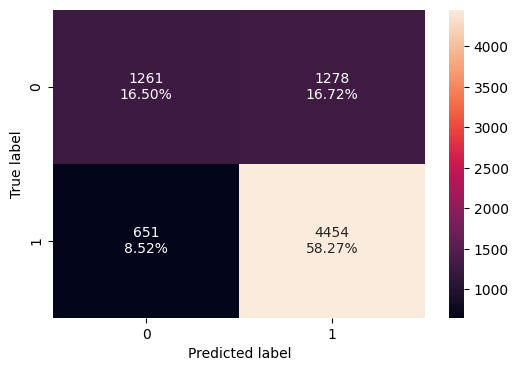

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(xgb_classifier_tuned, X_test,y_test)

In [ ]:
# performance metrics on test data
xgb_classifier_tuned_model_test_perf = model_performance_classification_sklearn(xgb_classifier_tuned, X_test, y_test)
print("Testing performance \n",xgb_classifier_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.747645  0.872478   0.777041  0.821999


- The tuned model is not oerfitting too much and the F1 score of ~ 0.82 is good

In [ ]:
# display feature importance
print(pd.DataFrame(xgb_classifier_tuned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
education_of_employee_1           0.335503
has_job_experience_1              0.111469
education_of_employee_3           0.091702
education_of_employee_4           0.079020
continent_Europe                  0.053217
unit_of_wage_Year                 0.042765
region_of_employment_Northeast    0.030469
region_of_employment_Midwest      0.030322
region_of_employment_South        0.029645
region_of_employment_West         0.027068
continent_Asia                    0.025614
prevailing_wage                   0.022914
full_time_position_1              0.020728
continent_North America           0.016265
unit_of_wage_Week                 0.015152
continent_South America           0.014598
requires_job_training_1           0.014358
unit_of_wage_Month                0.010627
company_age                       0.010243
no_of_employees                   0.009606
continent_Oceania                 0.008714


#### Evaluate models for stacking model

In [ ]:
# set df for training data performance
models_train_comp_df = pd.concat(
    [
        dec_tree_model_train_perf.T,
        dec_tree_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_classifier_tuned_model_train_perf.T,
        rf_classifier_model_train_perf.T,
        rf_classifier_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        ab_classifier_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gb_classifier_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_classifier_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Classifier",
    "Tuned Decision Tree Classifier",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "Tuned XGBoost Classifier",
]

# set df test perforamnce
models_test_comp_df = pd.concat(
    [
        dec_tree_model_test_perf.T,
        dec_tree_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_classifier_tuned_model_test_perf.T,
        rf_classifier_model_test_perf.T,
        rf_classifier_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        ab_classifier_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gb_classifier_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_classifier_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree Classifier",
    "Tuned Decision Tree Classifier",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest Classifier",
    "Tuned Random Forest Classifier",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "Tuned XGBoost Classifier",
]

In [ ]:
# display training results
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Classifier,Tuned Decision Tree Classifier,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,Tuned XGBoost Classifier
Accuracy,1.0,0.712548,0.985198,0.994393,1.0,0.773884,0.738226,0.718995,0.758802,0.763848,0.838753,0.766315
Recall,1.0,0.931923,0.986066,0.999832,1.0,0.907832,0.887182,0.781247,0.883740,0.883489,0.931419,0.881978
Precision,1.0,0.720067,0.991726,0.991839,1.0,0.786545,0.760688,0.794587,0.783042,0.788449,0.843482,0.791846
F1,1.0,0.812411,0.988888,0.995820,1.0,0.842848,0.819080,0.787861,0.830349,0.833267,0.885272,0.834485


In [ ]:
# display test results
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree Classifier,Tuned Decision Tree Classifier,Bagging Classifier,Tuned Bagging Classifier,Random Forest Classifier,Tuned Random Forest Classifier,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,Tuned XGBoost Classifier
Accuracy,0.655285,0.706567,0.694662,0.729461,0.724490,0.743197,0.734301,0.716510,0.744767,0.745290,0.733255,0.747645
Recall,0.750049,0.930852,0.765916,0.901077,0.843095,0.886582,0.885015,0.781391,0.876004,0.872282,0.860921,0.872478
Precision,0.738049,0.715447,0.774411,0.746390,0.767338,0.765821,0.757799,0.791468,0.772366,0.774704,0.767820,0.777041
F1,0.744001,0.809058,0.770140,0.816471,0.803435,0.821788,0.816481,0.786397,0.820927,0.820603,0.811709,0.821999


##### Check features of importance

In [ ]:
print(pd.DataFrame(rf_classifier_tuned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
education_of_employee_1           0.239545
prevailing_wage                   0.147533
has_job_experience_1              0.119699
education_of_employee_3           0.083328
no_of_employees                   0.072826
company_age                       0.058537
unit_of_wage_Year                 0.048575
continent_Europe                  0.044488
education_of_employee_4           0.044055
region_of_employment_Midwest      0.024187
region_of_employment_West         0.019218
continent_Asia                    0.016419
continent_North America           0.014449
region_of_employment_South        0.014045
full_time_position_1              0.012993
requires_job_training_1           0.012136
region_of_employment_Northeast    0.011627
continent_South America           0.008289
continent_Oceania                 0.002958
unit_of_wage_Week                 0.002931
unit_of_wage_Month                0.002161


In [ ]:
print(pd.DataFrame(ab_classifier.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
prevailing_wage                       0.36
no_of_employees                       0.24
company_age                           0.08
education_of_employee_3               0.06
education_of_employee_1               0.04
region_of_employment_Midwest          0.04
continent_Europe                      0.02
continent_North America               0.02
unit_of_wage_Week                     0.02
region_of_employment_West             0.02
region_of_employment_South            0.02
full_time_position_1                  0.02
has_job_experience_1                  0.02
education_of_employee_4               0.02
continent_South America               0.02
continent_Asia                        0.00
region_of_employment_Northeast        0.00
unit_of_wage_Month                    0.00
continent_Oceania                     0.00
unit_of_wage_Year                     0.00
requires_job_training_1               0.00


In [ ]:
print(pd.DataFrame(gb_classifier.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
education_of_employee_1           0.285978
has_job_experience_1              0.155462
prevailing_wage                   0.136663
education_of_employee_3           0.087551
education_of_employee_4           0.083538
continent_Europe                  0.063035
unit_of_wage_Year                 0.036526
region_of_employment_Midwest      0.034432
region_of_employment_South        0.019024
no_of_employees                   0.014866
continent_North America           0.014537
company_age                       0.014235
region_of_employment_West         0.013583
continent_Asia                    0.011354
full_time_position_1              0.009000
region_of_employment_Northeast    0.008039
continent_South America           0.007043
requires_job_training_1           0.004692
continent_Oceania                 0.000311
unit_of_wage_Month                0.000133
unit_of_wage_Week                 0.000000


#### Evaluation of models for stacking

- Decision Tree excluded due to overfitting
- Bagging Classifier excluded due to overfitting
- Tuned Bagging Classifier excluded due to overfitting
- Random Forest excluded due to overfitting
- Tuned Decision Tree excluded as only one feature shown in importance

- Models to be used:
  - Tuned Random Forest - highest F1 score
  - Adaboost Classifier - high performance metrics with different features of importance
  - Gradient Boost Classifier - highest metrics of boosting models and some variance in features of importance
  - Tuned XBoost Classifier to be used as final estimator


### Stacking Classifier

In [ ]:
# set models to be used in stacking model
estimators = [("Tuned Random Forest", rf_classifier_tuned), ("Adaboost", ab_classifier), ("Gradient Boosting", gb_classifier)]
final_estimator = xgb_classifier_tuned

# set stacking model to variable and fit to train data
stacking_estimator = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Tuned Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=5,
                                                       n_estimators=25,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Adaboost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 co...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=200, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

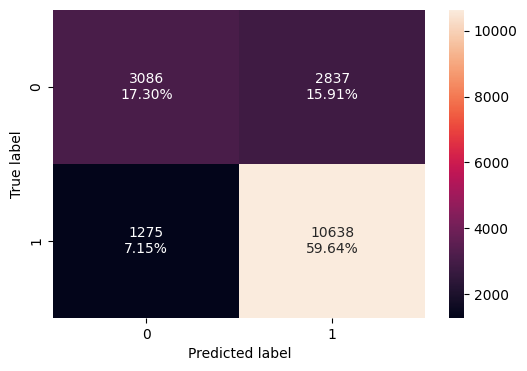

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(stacking_estimator, X_train,y_train)

In [ ]:
# performance metrics on train data
stacking_estimator_train_perf = model_performance_classification_sklearn(stacking_estimator, X_train,y_train)
print("Training performance \n",stacking_estimator_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.769455  0.892974   0.789462  0.838034


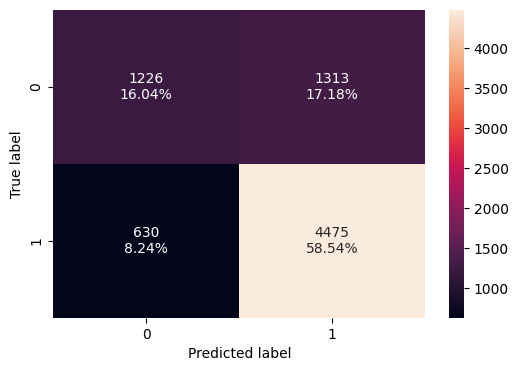

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(stacking_estimator, X_test,y_test)

In [ ]:
# performance metrics on test data
stacking_estimator_test_perf = model_performance_classification_sklearn(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.745814  0.876592   0.773151  0.821629


- Stacking model is slightly overfitting with good performance metrics

## Model Performance Comparison and Conclusions

In [ ]:
# set df for training data performance
models_train_comp_df = pd.concat(
    [
        dec_tree_model_train_perf.T,
        dec_tree_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_classifier_tuned_model_train_perf.T,
        rf_classifier_model_train_perf.T,
        rf_classifier_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        ab_classifier_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gb_classifier_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_classifier_tuned_model_train_perf.T,
        stacking_estimator_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Classifier",
    "Tuned Decision Tree Classifier",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest Classifier",
    "Tuned Random Forest Classifier",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "Tuned XGBoost Classifier",
    "Stacking Classifier",
]

# set df test perforamnce
models_test_comp_df = pd.concat(
    [
        dec_tree_model_test_perf.T,
        dec_tree_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_classifier_tuned_model_test_perf.T,
        rf_classifier_model_test_perf.T,
        rf_classifier_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        ab_classifier_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gb_classifier_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_classifier_tuned_model_test_perf.T,
        stacking_estimator_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree Classifier",
    "Tuned Decision Tree Classifier",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest Classifier",
    "Tuned Random Forest Classifier",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "Tuned XGBoost Classifier",
    "Stacking Classifier",
]

In [ ]:
# display training results
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Classifier,Tuned Decision Tree Classifier,Bagging Classifier,Tuned Bagging Classifier,Random Forest Classifier,Tuned Random Forest Classifier,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,Tuned XGBoost Classifier,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.994393,1.0,0.773884,0.738226,0.718995,0.758802,0.763848,0.838753,0.766315,0.769455
Recall,1.0,0.931923,0.986066,0.999832,1.0,0.907832,0.887182,0.781247,0.883740,0.883489,0.931419,0.881978,0.892974
Precision,1.0,0.720067,0.991726,0.991839,1.0,0.786545,0.760688,0.794587,0.783042,0.788449,0.843482,0.791846,0.789462
F1,1.0,0.812411,0.988888,0.995820,1.0,0.842848,0.819080,0.787861,0.830349,0.833267,0.885272,0.834485,0.838034


In [ ]:
# display test results
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree Classifier,Tuned Decision Tree Classifier,Bagging Classifier,Tuned Bagging Classifier,Random Forest Classifier,Tuned Random Forest Classifier,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,Tuned XGBoost Classifier,Stacking Classifier
Accuracy,0.655285,0.706567,0.694662,0.729461,0.724490,0.743197,0.734301,0.716510,0.744767,0.745290,0.733255,0.747645,0.745814
Recall,0.750049,0.930852,0.765916,0.901077,0.843095,0.886582,0.885015,0.781391,0.876004,0.872282,0.860921,0.872478,0.876592
Precision,0.738049,0.715447,0.774411,0.746390,0.767338,0.765821,0.757799,0.791468,0.772366,0.774704,0.767820,0.777041,0.773151
F1,0.744001,0.809058,0.770140,0.816471,0.803435,0.821788,0.816481,0.786397,0.820927,0.820603,0.811709,0.821999,0.821629


In [ ]:
models_test_comp_df.mean().sort_values(ascending=False)

Tuned XGBoost Classifier           0.804791
Tuned Random Forest Classifier     0.804347
Stacking Classifier                0.804296
Gradient Boost Classifier          0.803516
Tuned Gradient Boost Classifier    0.803220
Adaboost Classifier                0.798399
Tuned Bagging Classifier           0.798350
XGBoost Classifier                 0.793426
Tuned Decision Tree Classifier     0.790481
Random Forest Classifier           0.784589
Tuned Adaboost Classifier          0.768941
Bagging Classifier                 0.751282
Decision Tree Classifier           0.721846
dtype: float64

- Maximizing the F1 score will minimize false negatives and false positives and will be used as a key performance metric
- The Tuned XBoost Classifier has the highest F1 score and the highest average of performance metrics and will be used as the final model

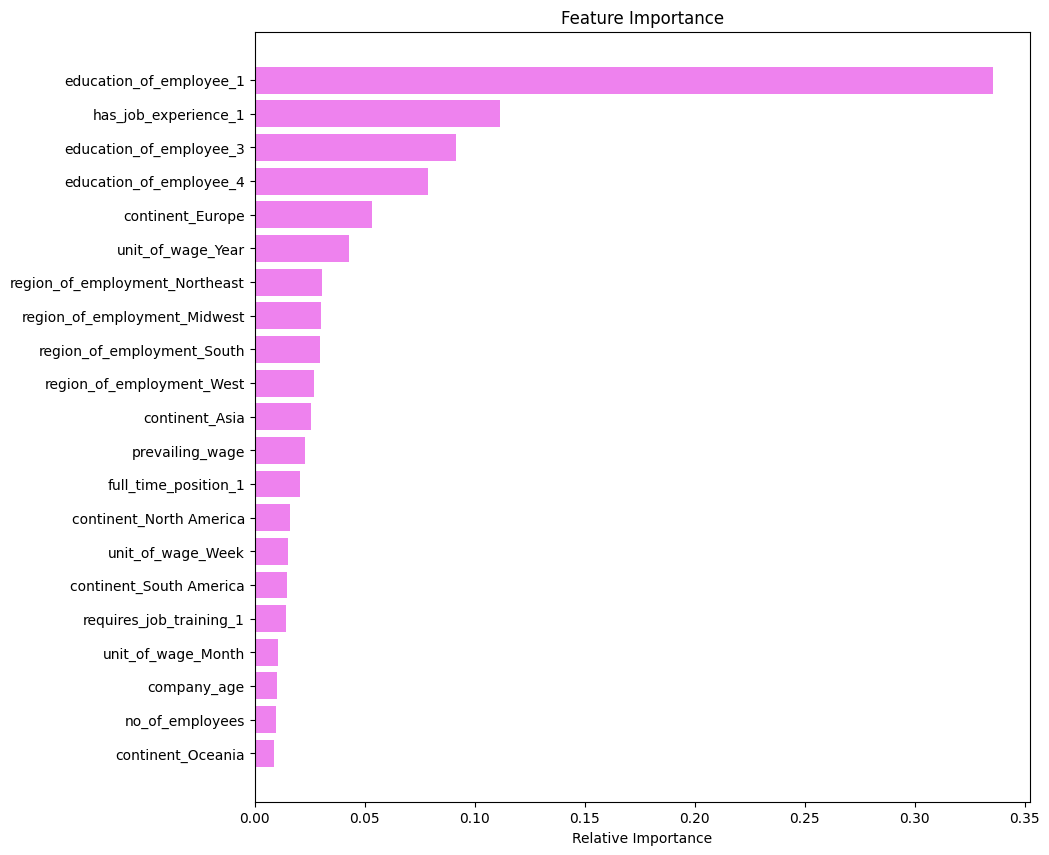

In [ ]:
# display feature importance for final model
feature_names = X_train.columns
importances = xgb_classifier_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# function to interpret direction of influence
def determine_influence_direction(data, features, target):
    """
    Perform logistic regression to determine the direction of influence for multiple features.

    Parameters:
    - data: DataFrame containing the dataset.
    - features: List of feature names to analyze.
    - target: Name of the target variable.

    Returns:
    - A dictionary where keys are feature names, and values are dictionaries containing
      the direction of influence (positive, negative, or little influence) and the p-value.
    """
    influence_directions = {}

    for feature in features:
        X_train1, X_test1, y_train1, y_test1 = train_test_split(data[[feature]], data[target], test_size=0.2, random_state=42)
        logistic_model = LogisticRegression()
        logistic_model.fit(X_train1, y_train1)

        # add constant term to the model
        X_train1 = sm.add_constant(X_train1)

        # fit logistic regression using statsmodels
        model = sm.Logit(y_train1, X_train1)
        result = model.fit(disp=False)

        # get coefficient and p-value for the current feature
        coef_feature = logistic_model.coef_[0][0]
        p_value = result.pvalues[feature]

        # interpret coefficient and store the result
        if coef_feature > 1:
            direction = "strongly positive influence"
        elif coef_feature > 0:
            direction = "slightly positive influence"
        elif coef_feature < -1:
            direction = "strongly negative influence"
        elif coef_feature < 0:
            direction = "slightly negative influence"
        else:
            direction = "little to no influence"

        influence_directions[feature] = {"direction": direction, "coef": coef_feature, "p-value": p_value}

    return influence_directions

In [ ]:
# concat x and y train for further analysis
data = pd.concat([X_train, y_train], axis=1)

In [ ]:
# Set features and send to function to interpret direction of influence
features_to_analyze = data.columns.tolist()
target_variable = 'case_status'
directions = determine_influence_direction(data, features_to_analyze, target_variable)

# set data to df and filter significant features
direction_df = pd.DataFrame(directions).T
significant_df = direction_df[direction_df['p-value'] < 0.05]
significant_df = significant_df.sort_values('coef', ascending=False)

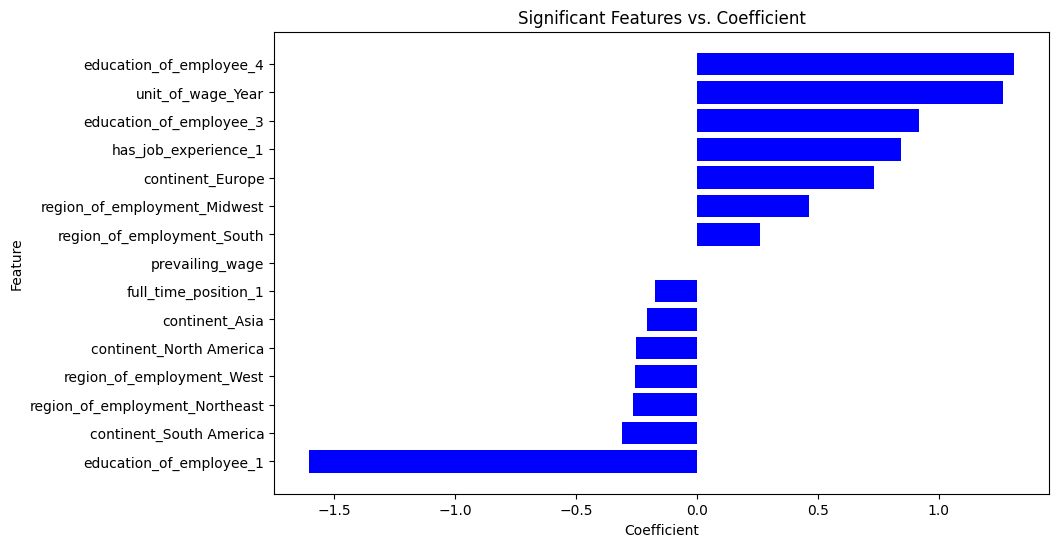

In [ ]:
# plot feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(significant_df.index, significant_df['coef'], color='blue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Significant Features vs. Coefficient')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# show all coef and p-values for evaluation
direction_df

,direction,coef,p-value
no_of_employees,slightly positive influence,0.000012,0.191758
prevailing_wage,slightly positive influence,0.000008,0.0
company_age,slightly negative influence,-0.000492,0.243116
continent_Asia,slightly negative influence,-0.205766,0.0
continent_Europe,slightly positive influence,0.730664,0.0
continent_North America,slightly negative influence,-0.252559,0.000001
continent_Oceania,slightly positive influence,0.087045,0.675237
continent_South America,slightly negative influence,-0.310072,0.000654
education_of_employee_4,strongly positive influence,1.310342,0.0
education_of_employee_1,strongly negative influence,-1.603191,0.0


## Actionable Insights

**Education Matters:**
Education level of the employee is the most influencial factor in the certification process. Employees with only a high school education are more likely to be denied and the data suggests that having a higher level of education sigficantly influences visa approval.

**Job Experience Counts:**
Beyond education, having job experience is the second most influencial factor in visa approval. Applicants with prior work experience are more likely to have a visa aproved that applicants without prior experience.

**Geographical Factors:**
Continent of the employee and the region of anticipated employment have differening influences on visa approval. Applicants from Europe seem to be favored in approvals with other continents being less favorable or more prone to denial. Positions in the Midwest and in the South tend to have favorable approval outcomes, with other regions being less influential in a negative manner.

**Wages and Wage Units:**
Yearly unit of wage has significant positive impact on visa approval and the prevaling wage amount has a smaller, but still positive, influence on visa approval.

**Other Factors:**
There are several other factors that moderately influence the approval or denial of visa applications. The factors requires job training, company age, number of employees, and  full time position have some influence on visa application status but to a lesser extent than the factors listed above.

## Recommendations

**Automate Initial Screening:** Implement an automated system that utilizes the classification model to streamline the initial review of visa applications. Categorize applications as "Likely Approval" and "Likely Denial" based on the significant drivers identified by the model.

**Priority Processing:** Prioritize applications falling into the "Likely Approval" category to expedite processing. This ensures efficient handling of strong profiles and reduces processing times.

**Focused Review for Marginal Cases:** Allocate resources for a more thorough review of applications classified as "Likely Denial." This approach ensures that borderline cases receive careful consideration, minimizing the risk of undeserved denials.

**Wage Strategy for Employers:** Advise employers to offer competitive wages, particularly on a yearly basis (e.g., "unit_of_wage_Year"), as it strongly influences visa approval. Ensure that offered wages comply with prevailing wage standards to enhance approval chances.

**Regular Collaboration and Continuous Model Enhancement:** Establish a process for ongoing model updates to adapt to evolving trends and regulatory changes in visa processing. Maintain an open and collaborative dialogue with EasyVisa to receive updates on visa approval trends and emerging drivers. Collaborate closely to ensure that recommendations align with the OFLC's goals and policies. Regularly monitor the model's performance and refine it as needed.

#### *Suitable Applicant Profile*

**Education:** A suitable candidate should have an education beyond high school. This educational qualification significantly enhances visa approval.

**Experience:** A suitable candidate has a history of prior work experience. This experience increases their chances of visa approval.

**Geographic Alignment:** A suitable candidate should have a willingness and potential to work in regions and continents with positive approval trends. Preferences should also be given to candidates coming from continents with favorable trends over other continents, in accordance with local laws and regulations.